# 1. Load Aggregated Data

In [1]:
# import necessary package
import os
import pandas as pd
import numpy as np

from datasets import load_dataset
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = load_dataset(data_files = "train.parquet", path = "data/aggregated_data", split = "train")
# test_data = load_dataset(data_files = "test.parquet", path = "data/aggregated_data", split = "train")
train_df = train_data.to_pandas()
# test_df = test_data.to_pandas()

# release memory
del train_data
# del test_data

train_df.shape

(7377418, 20)

# 2. Data Pre-processing(Clean)

## 2.1 Data basic information

In [3]:
train_df.head(5)

msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  song_length genre_ids  \
0              Explore  online-playlist       1     206471.0       359   
1  Local playlist more   local-playlist       1     284584.0      1259   
2  Local playlist more   local-playlist       1     225396.0      1259   
3  Local playlist more   local-playlist       1     255512.0      1019   
4              Explore  online-playlist       1     187802.0      1011   

       artist_name                                 composer lyricist  \
0         Bastille                     Dan Smith| Mark Crew     None   
1  Various Artists                                     None     None   
2              Nas     N. Jones、W. Adams、J. Lordan、D. Ingle     None   
3         Soundway                            Kwadwo Donkoh     None   
4      Brett Young  Brett Young| Kelly Archer| Justin Ebach     None   

   language  city  bd  gender  registered_via  registration_init_time  \
0      52.0     1   0    None               7                20120102   
1      52.0    13  24  female               9                20110525   
2      52.0    13  24  female               9                20110525   
3      -1.0    13  24  female               9                20110525   
4      52.0     1   0    None               7                20120102   

   expiration_date                                     name          isrc  
0         20171005                               Good Grief  GBUM71602854  
1         20170911                       Lords of Cardboard  US3C69910183  
2         20170911  Hip Hop Is Dead(Album Version (Edited))  USUM70618761  
3         20170911                             Disco Africa  GBUQH1000063  
4         20171005                        Sleep Without You  QM3E21606003

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
 18  name                    object 
 19  isrc                    object 
dtypes: float64(2), int64(6), object(12)
memory usage: 1.1+ GB


In [5]:
train_df.describe()

target   song_length      language          city            bd  \
count  7.377418e+06  7.377304e+06  7.377268e+06  7.377418e+06  7.377418e+06   
mean   5.035171e-01  2.451210e+05  1.860933e+01  7.511399e+00  1.753927e+01   
std    4.999877e-01  6.734471e+04  2.117681e+01  6.641625e+00  2.155447e+01   
min    0.000000e+00  1.393000e+03 -1.000000e+00  1.000000e+00 -4.300000e+01   
25%    0.000000e+00  2.147260e+05  3.000000e+00  1.000000e+00  0.000000e+00   
50%    1.000000e+00  2.418120e+05  3.000000e+00  5.000000e+00  2.100000e+01   
75%    1.000000e+00  2.721600e+05  5.200000e+01  1.300000e+01  2.900000e+01   
max    1.000000e+00  1.085171e+07  5.900000e+01  2.200000e+01  1.051000e+03   

       registered_via  registration_init_time  expiration_date  
count    7.377418e+06            7.377418e+06     7.377418e+06  
mean     6.794068e+00            2.012810e+07     2.017157e+07  
std      2.275774e+00            3.017281e+04     3.869831e+03  
min      3.000000e+00            2.004033e+07     1.970010e+07  
25%      4.000000e+00            2.011070e+07     2.017091e+07  
50%      7.000000e+00            2.013102e+07     2.017093e+07  
75%      9.000000e+00            2.015102e+07     2.017101e+07  
max      1.300000e+01            2.017013e+07     2.020102e+07

## 2.2 Deal with the dirty data

In [6]:
# find dirty data
def find_dirty_values(data):
    dtypes = pd.DataFrame(data.dtypes,columns=["Data Type"])
    dtypes["Unique Values"]=data.nunique().sort_values(ascending=True)
    dtypes["Null Values"]=data.isnull().sum()
    dtypes["% null Values"]=data.isnull().sum()/len(data)
    return dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [7]:
train_result = find_dirty_values(train_df)

In [8]:
train_result

In [9]:
# handling with dirty data
def handling_missing_values(dataframe):
    cat_cols = dataframe.select_dtypes(include='O').columns
    num_cols = dataframe.select_dtypes(include = np.number).columns
    for col in cat_cols:
        dataframe[col] = dataframe[col].fillna('UnKnown')
    for col in num_cols:
        dataframe[col] = dataframe[col].interpolate(method='linear')
    return dataframe

In [10]:
print("Before handling missing values: ", train_df.shape)
train_df = handling_missing_values(train_df)
print("After handling missing values: ", train_df.shape)

Before handling missing values:  (7377418, 20)
After handling missing values:  (7377418, 20)


In [11]:
train_result = find_dirty_values(train_df)
train_result

In [12]:
train_df['bd'].describe()

count    7.377418e+06
mean     1.753927e+01
std      2.155447e+01
min     -4.300000e+01
25%      0.000000e+00
50%      2.100000e+01
75%      2.900000e+01
max      1.051000e+03
Name: bd, dtype: float64

In [13]:
invalid_age_count = train_df[(train_df['bd'] < 0) | (train_df['bd'] > 100)].shape[0]
print(f"Total invalid age count: {invalid_age_count}")

Total invalid age count: 6703


In [14]:
eda_image_dir = "images/EDA"
os.makedirs(eda_image_dir, exist_ok = True)

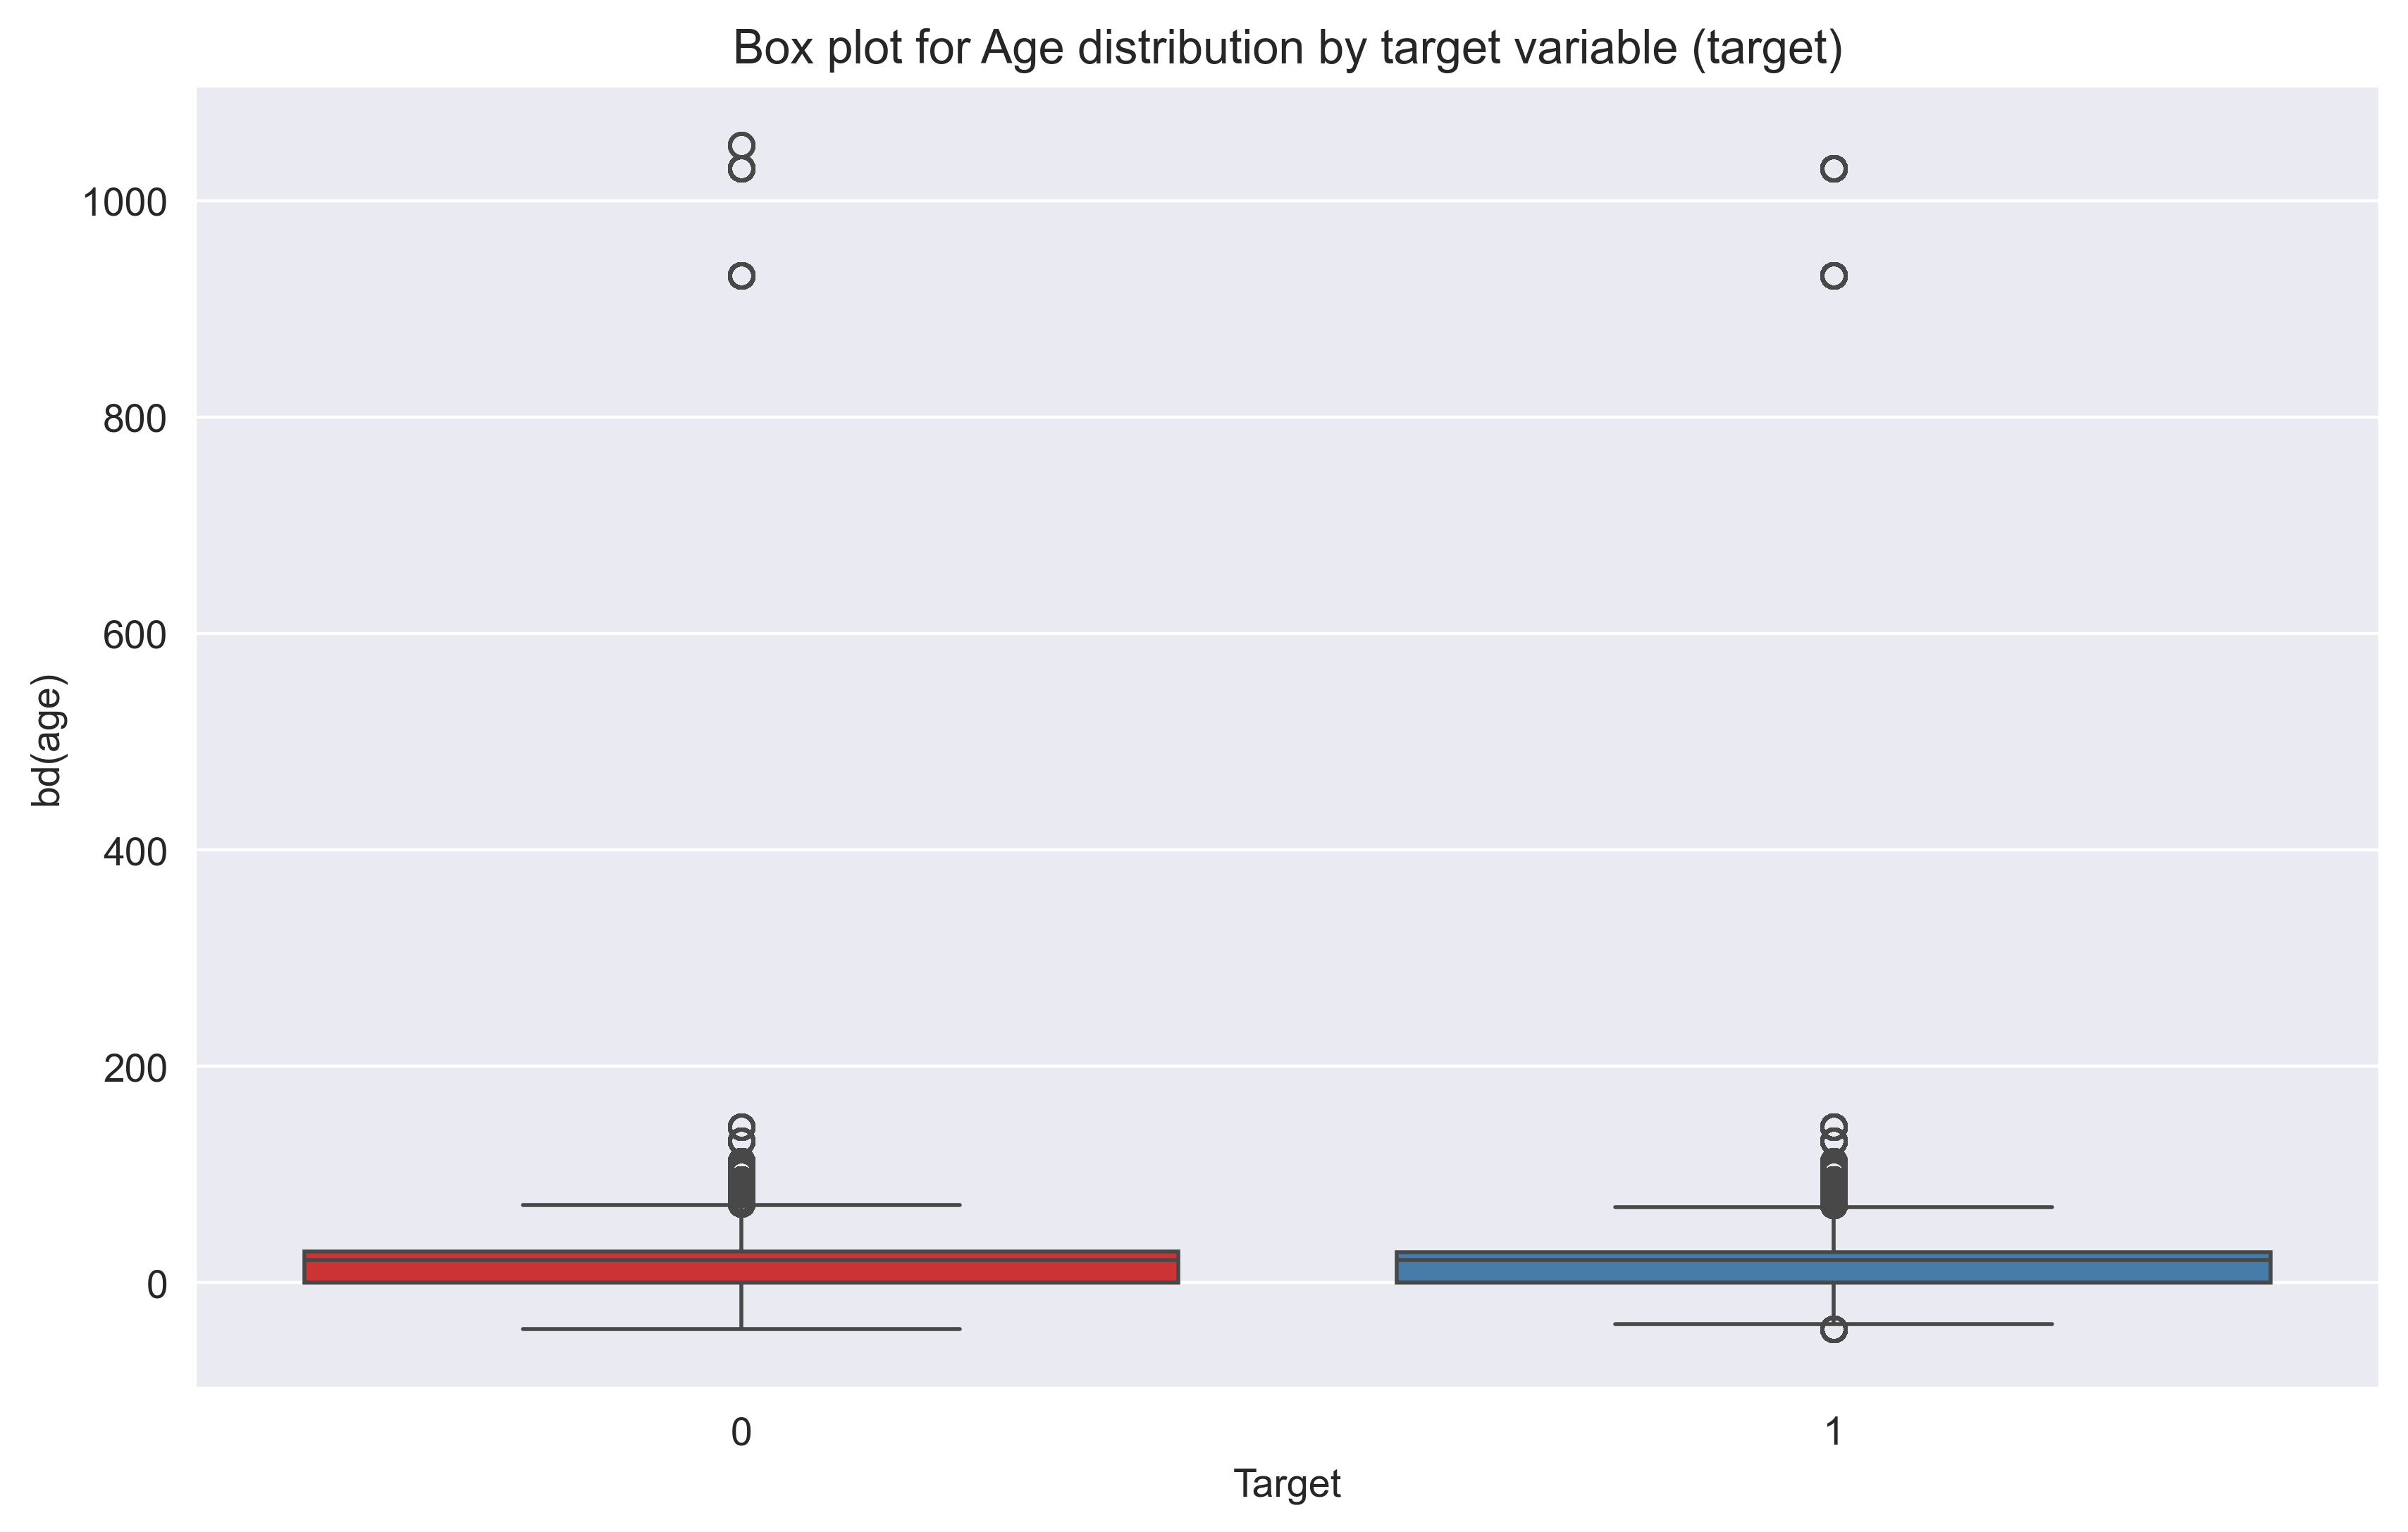

In [15]:
plt.figure(figsize=(10, 6), dpi = 400)
sns.boxplot(x='target', y='bd', data=train_df, palette='Set1')
plt.title('Box plot for Age distribution by target variable (target)')
plt.xlabel('Target')
plt.ylabel('bd(age)')
plt.savefig(os.path.join(eda_image_dir, '2.2_age_box_plot.jpg'))
plt.show()

- The graph shows that age is not a clear separating factor between whether a user listens to a song again or not.
Removing the bd column can be a reasonable option if you want to optimize the model and reduce noise from unrelated data. Age has no clear relationship to the target variable, and removing this column can make the model simpler and less prone to noise.
- `bd` column will be deleted later

## 2.3 Parsing Dates

In [16]:
date_cols = ['registration_init_time','expiration_date']
def date_formatting(date):
    date = str(date)
    date = f"{date[:4]}-{date[4:6]}-{date[6:]}"
    return date
def paring_date(dataframe,date):
    dataframe[date] = pd.to_datetime(dataframe[date])
    dataframe[f"{date}-day"] = dataframe[date].dt.day
    dataframe[f"{date}-month"] = dataframe[date].dt.month
    dataframe[f"{date}-year"] = dataframe[date].dt.year
    return dataframe

In [17]:
for col in date_cols:
    train_df[col] = train_df[col].apply(date_formatting)
    train_df = paring_date(train_df,col)

In [18]:
train_df.loc[:,'registration_init_time':].head()

registration_init_time expiration_date  \
0             2012-01-02      2017-10-05   
1             2011-05-25      2017-09-11   
2             2011-05-25      2017-09-11   
3             2011-05-25      2017-09-11   
4             2012-01-02      2017-10-05   

                                      name          isrc  \
0                               Good Grief  GBUM71602854   
1                       Lords of Cardboard  US3C69910183   
2  Hip Hop Is Dead(Album Version (Edited))  USUM70618761   
3                             Disco Africa  GBUQH1000063   
4                        Sleep Without You  QM3E21606003   

   registration_init_time-day  registration_init_time-month  \
0                           2                             1   
1                          25                             5   
2                          25                             5   
3                          25                             5   
4                           2                             1   

   registration_init_time-year  expiration_date-day  expiration_date-month  \
0                         2012                    5                     10   
1                         2011                   11                      9   
2                         2011                   11                      9   
3                         2011                   11                      9   
4                         2012                    5                     10   

   expiration_date-year  
0                  2017  
1                  2017  
2                  2017  
3                  2017  
4                  2017

In [19]:
train_df.shape

(7377418, 26)

## 2.4 EDA(Exploratory Data Analysis)

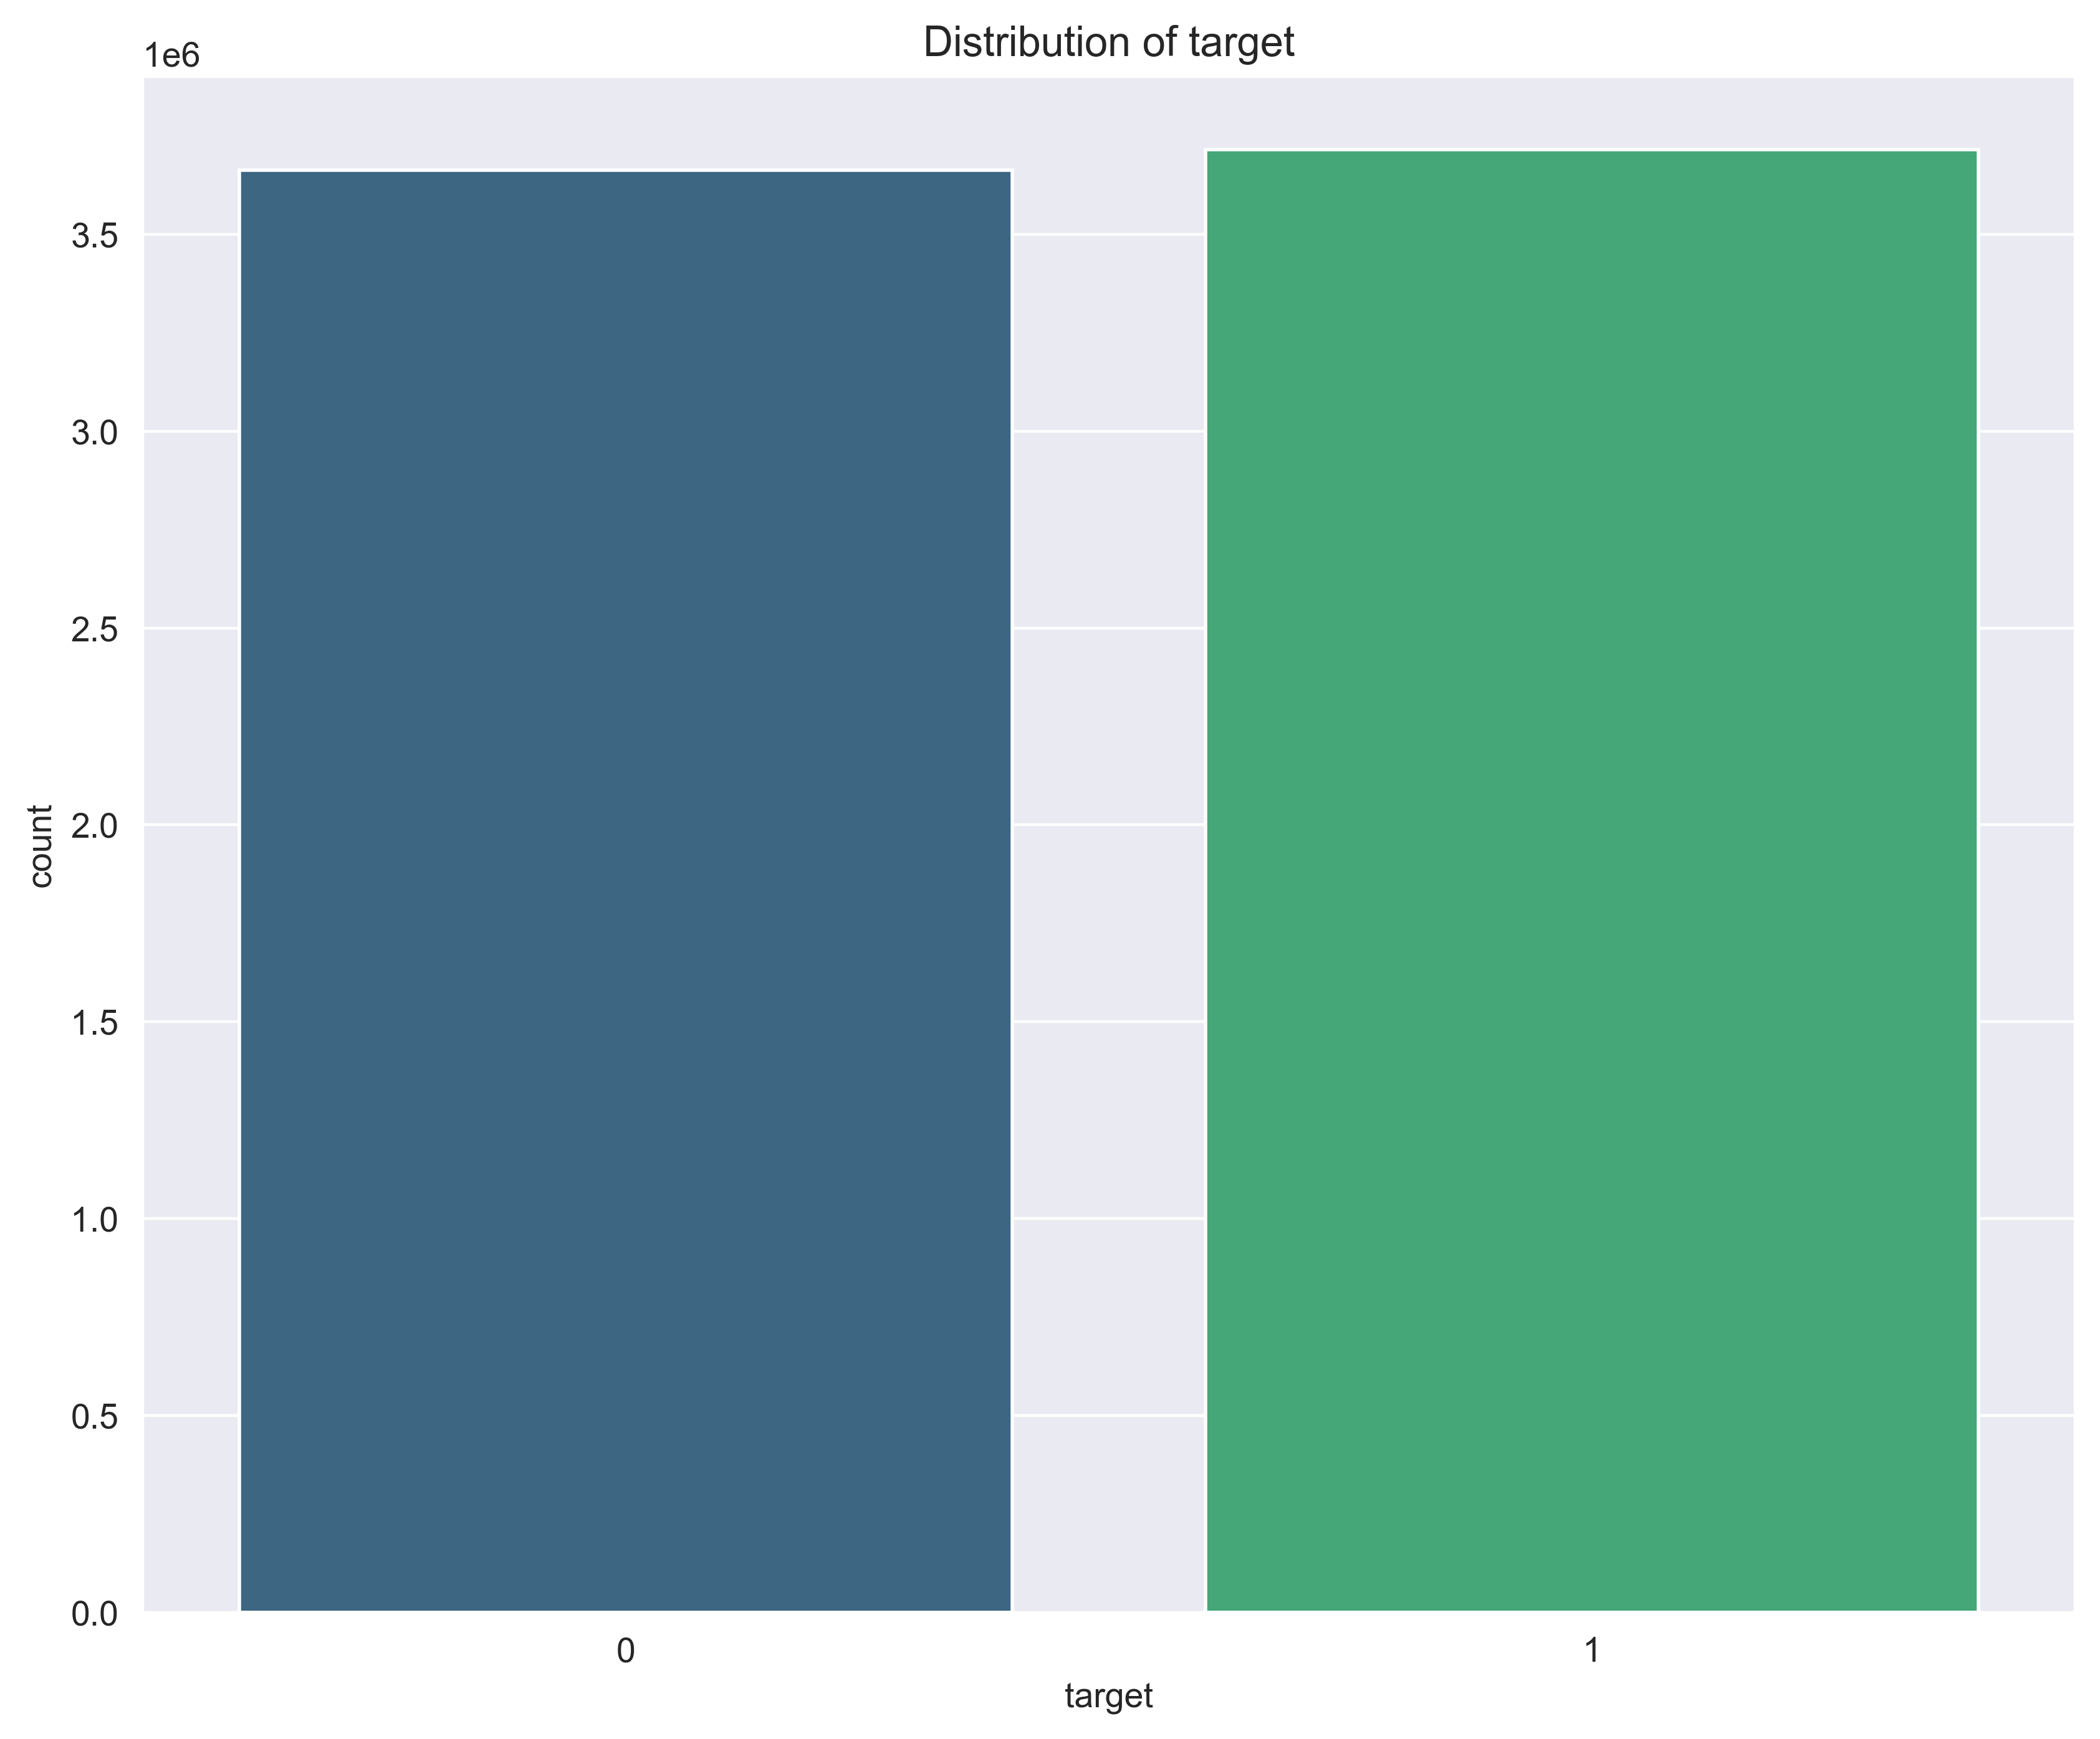

In [20]:
plt.figure(figsize=(10, 8), dpi=400)
sns.countplot(
    x='target',
    data=train_df,
    palette='viridis',
)
plt.title("Distribution of target")
plt.savefig(os.path.join(eda_image_dir, '2.4_distribution_of_target.jpg'))
plt.show()

- The graph shows that the distribution of the target variable is balanced.

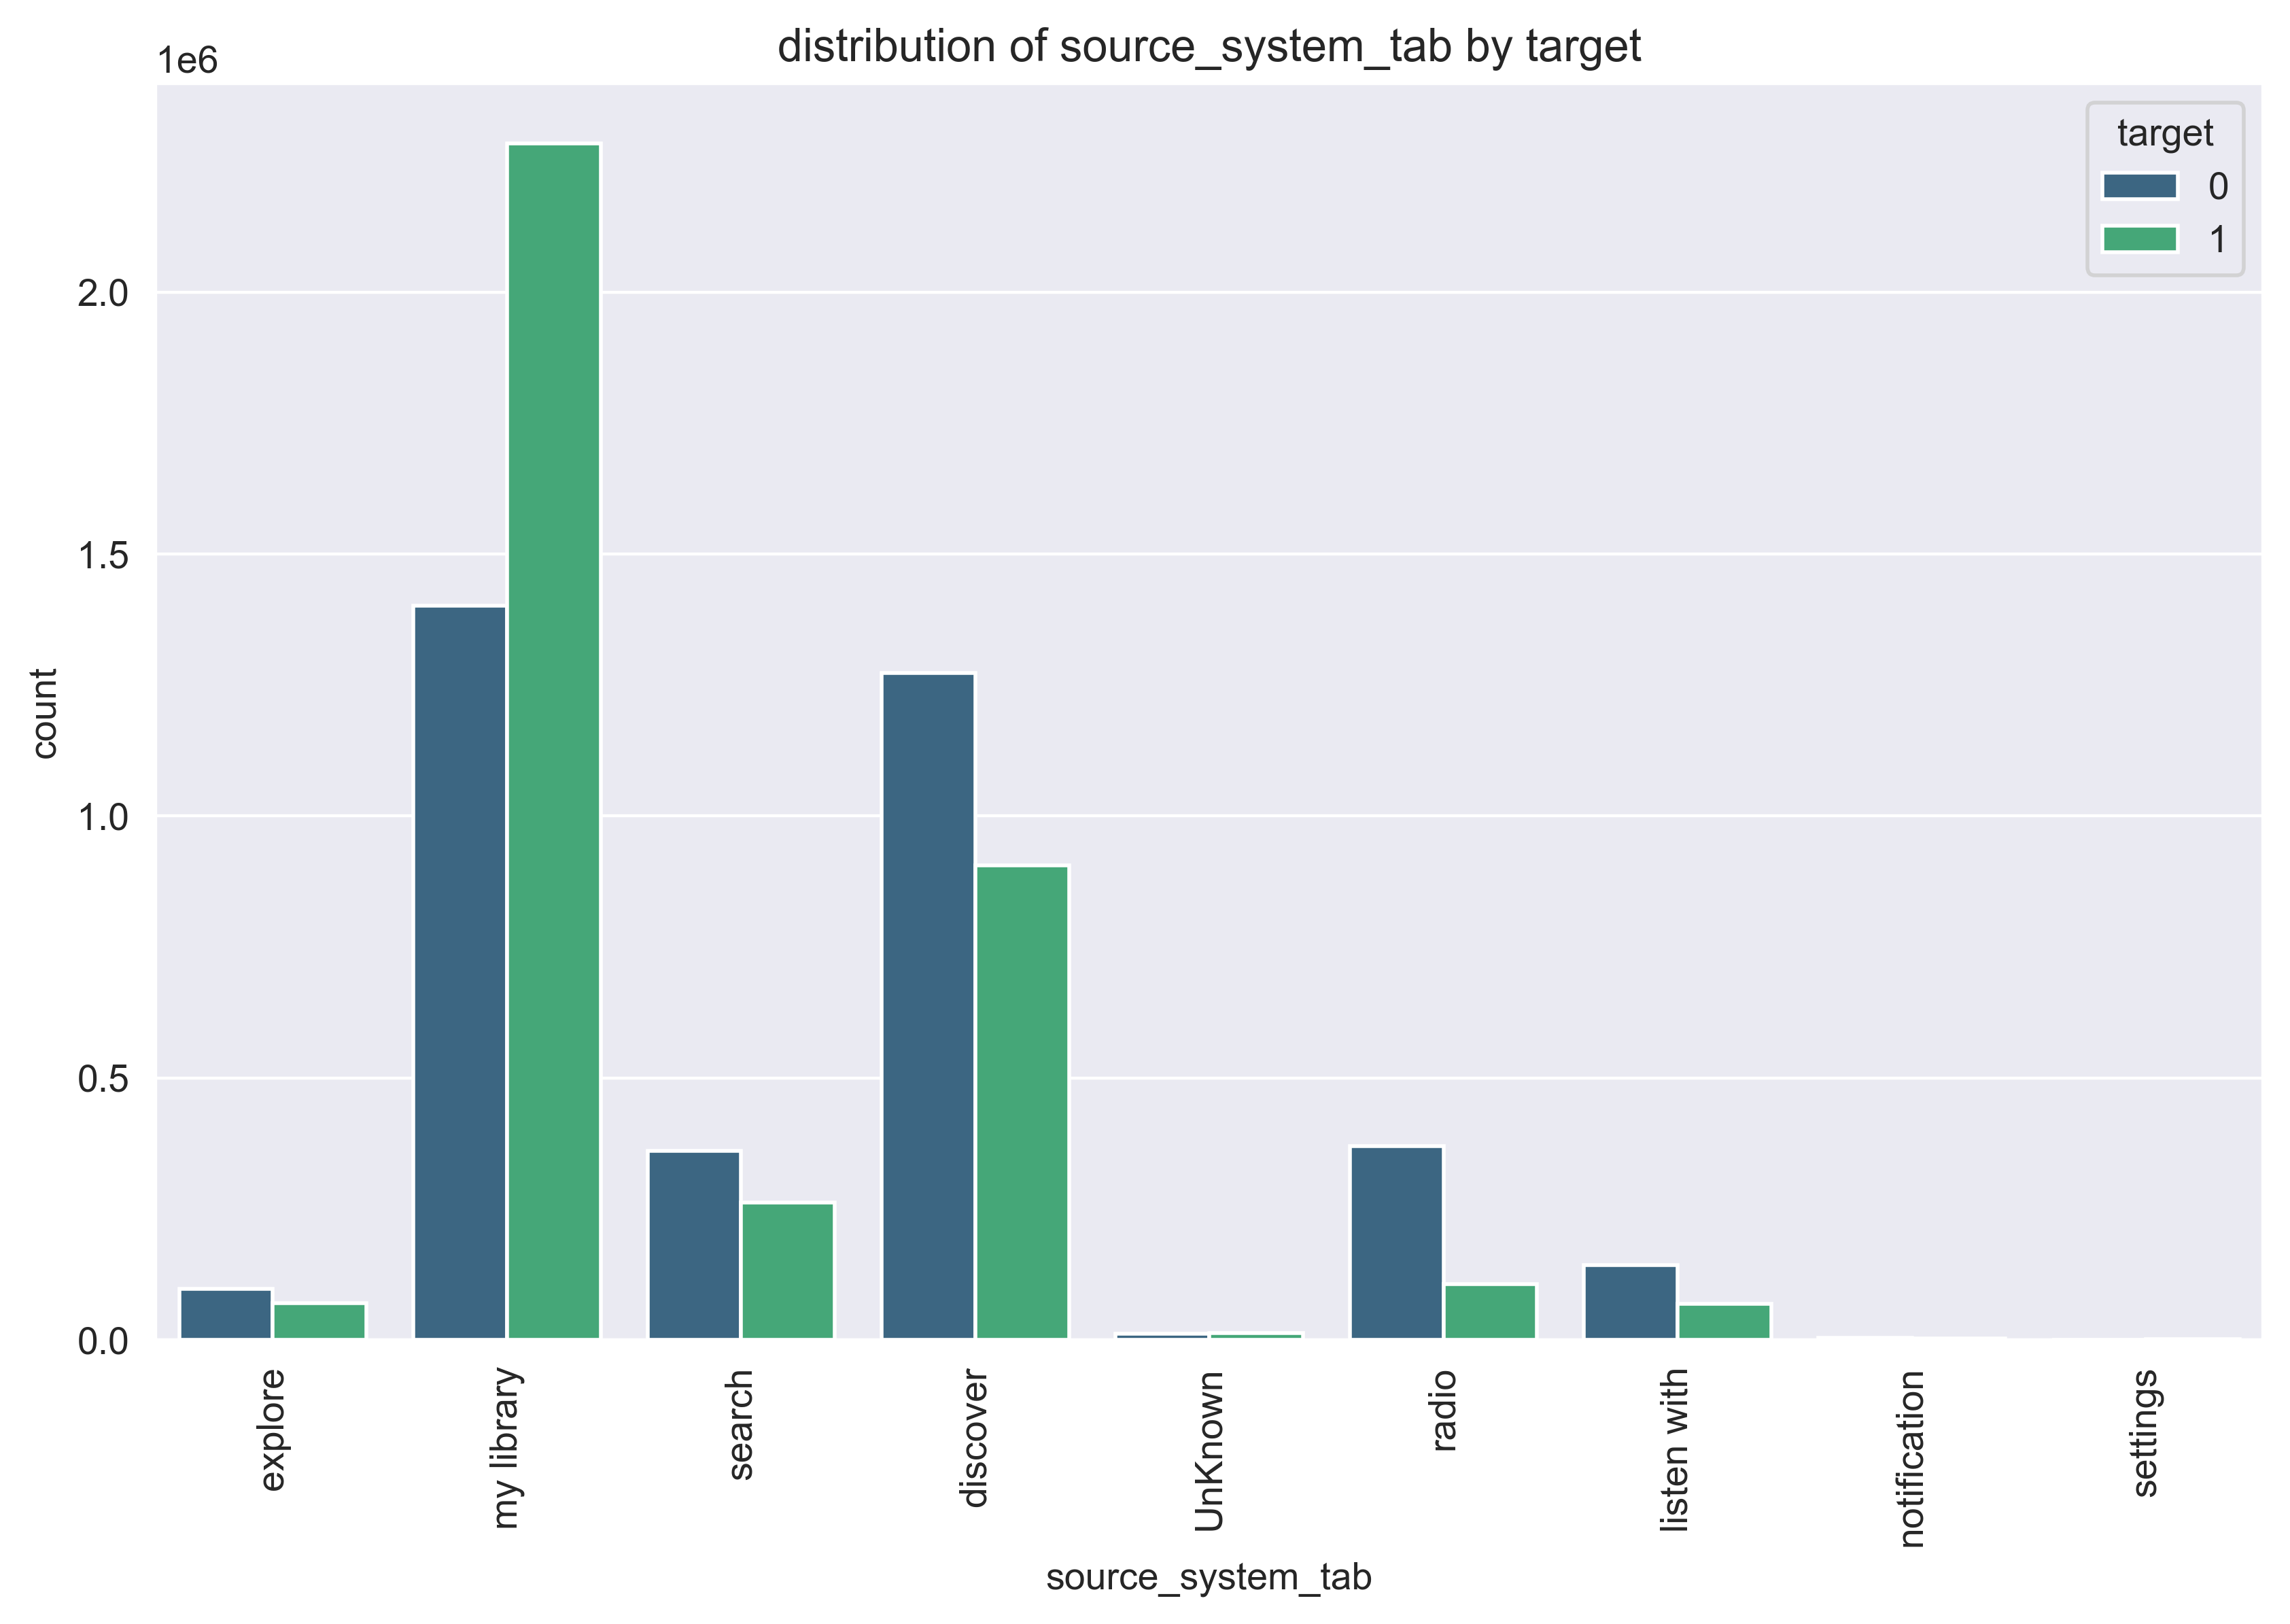

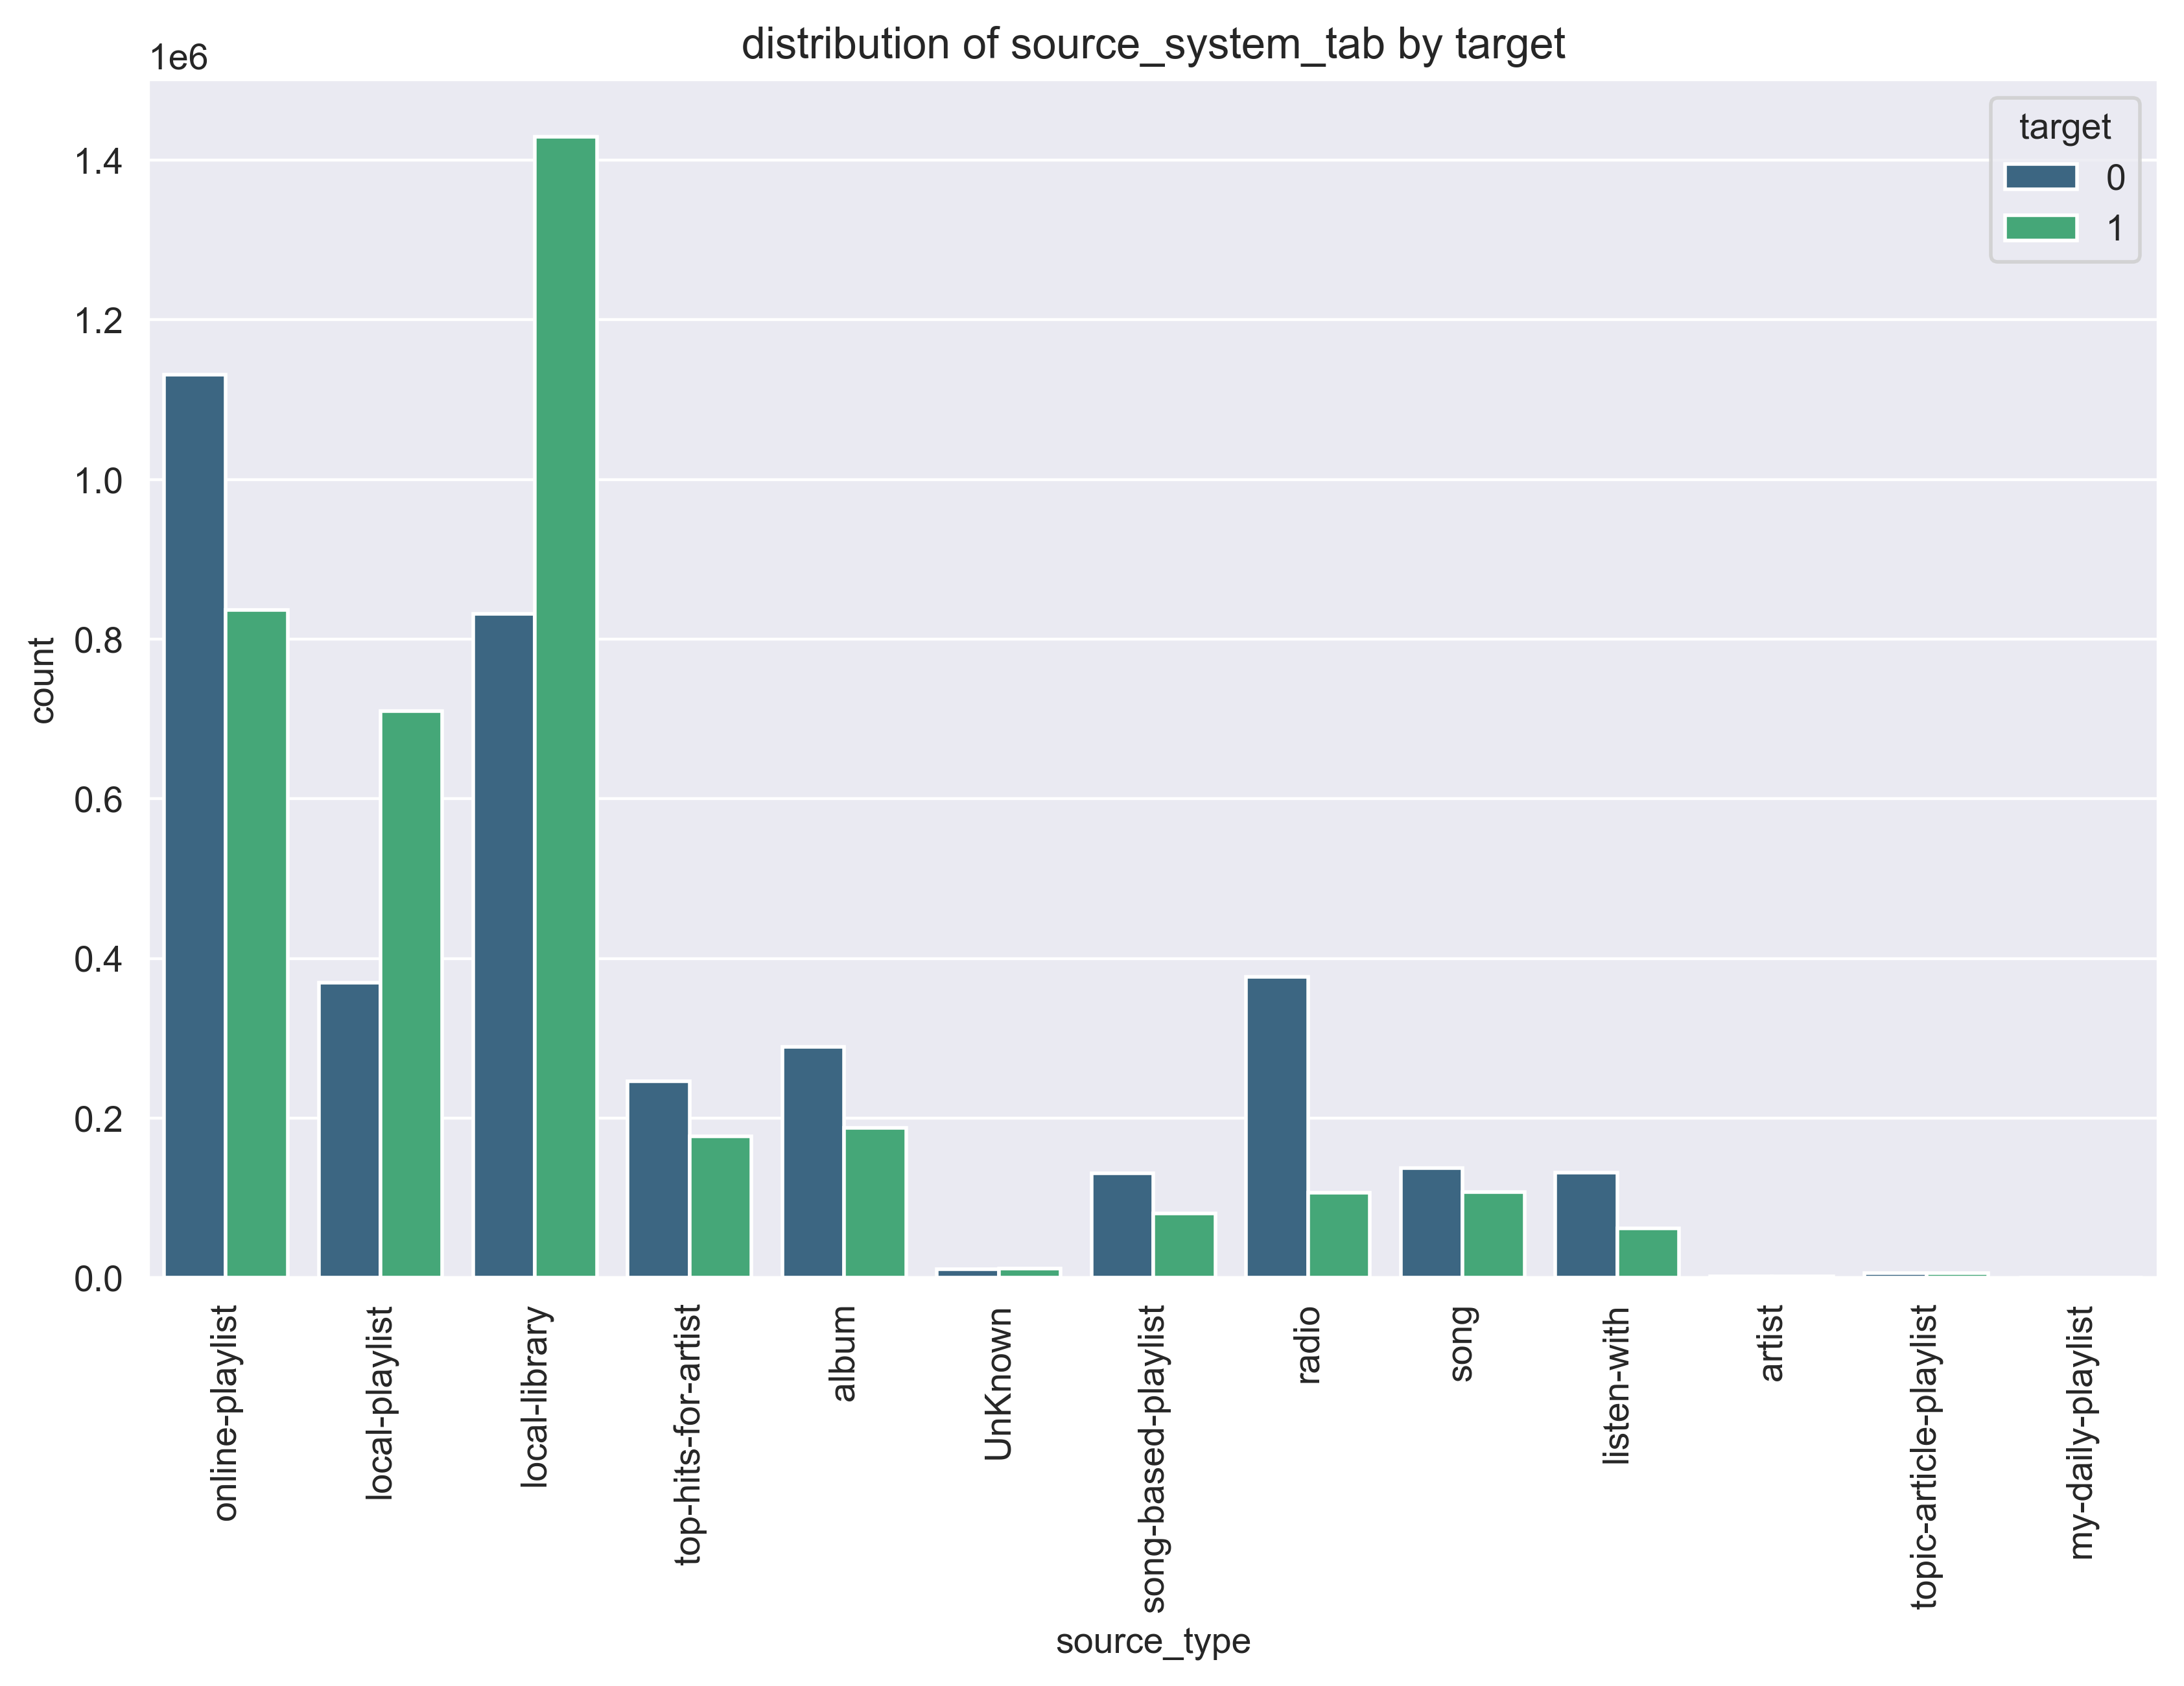

In [21]:
# Graph the distribution of source_system_tab by target
plt.figure(figsize=(10, 6), dpi = 400)
sns.countplot(x='source_system_tab', hue='target', data=train_df, palette='viridis')
plt.title('distribution of source_system_tab by target')
plt.xticks(rotation=90)
plt.savefig(os.path.join(eda_image_dir, '2.4_distribution_of_source_system_tab.jpg'))
plt.show()

# Graph the distribution of source_type by target
plt.figure(figsize=(10, 6), dpi = 400)
sns.countplot(x='source_type', hue='target', data=train_df, palette='viridis')
plt.title('distribution of source_system_tab by target')
plt.xticks(rotation=90)
plt.savefig(os.path.join(eda_image_dir, '2.4_distribution_of_source_system_tab.jpg'))
plt.show()

- Analyze categorical variables such as source _ system _ tab, source _ screen _ name, and source _ type to find out which sources users often use to listen to music.
    - Comments from the source_system_tab chart: Users who play music from the My Library tab tend to repeat the song (target = 1) more than other tabs, like Discover and Search, where the rate of listeners repeating the song is lower. Tabs like Explore, Radio, and Listen with have fewer users and the majority do not repeat the song.
    - Comments from the source_type chart: Local Library and Online Playlists are the types of sources where users often listen to songs again, with high repetition rates. In contrast, sources such as Radio and Song-based Playlists have lower replay rates, indicating that users from these sources are less likely to replay the songs they have heard.

In [22]:
# Create a new column "membership_duration" that is the length of time the user uses the service (by day)
train_df['membership_duration'] = (train_df['expiration_date'] - train_df['registration_init_time']).dt.days
train_df[['registration_init_time', 'expiration_date', 'membership_duration']].head(5)

registration_init_time expiration_date  membership_duration
0             2012-01-02      2017-10-05                 2103
1             2011-05-25      2017-09-11                 2301
2             2011-05-25      2017-09-11                 2301
3             2011-05-25      2017-09-11                 2301
4             2012-01-02      2017-10-05                 2103

In [23]:
invalid_duration = train_df[train_df['membership_duration'] < 0]
print(f"Total invalid duration: {invalid_duration.shape[0]}")

Total invalid duration: 3


In [24]:
train_df = train_df[train_df['membership_duration'] > 0]

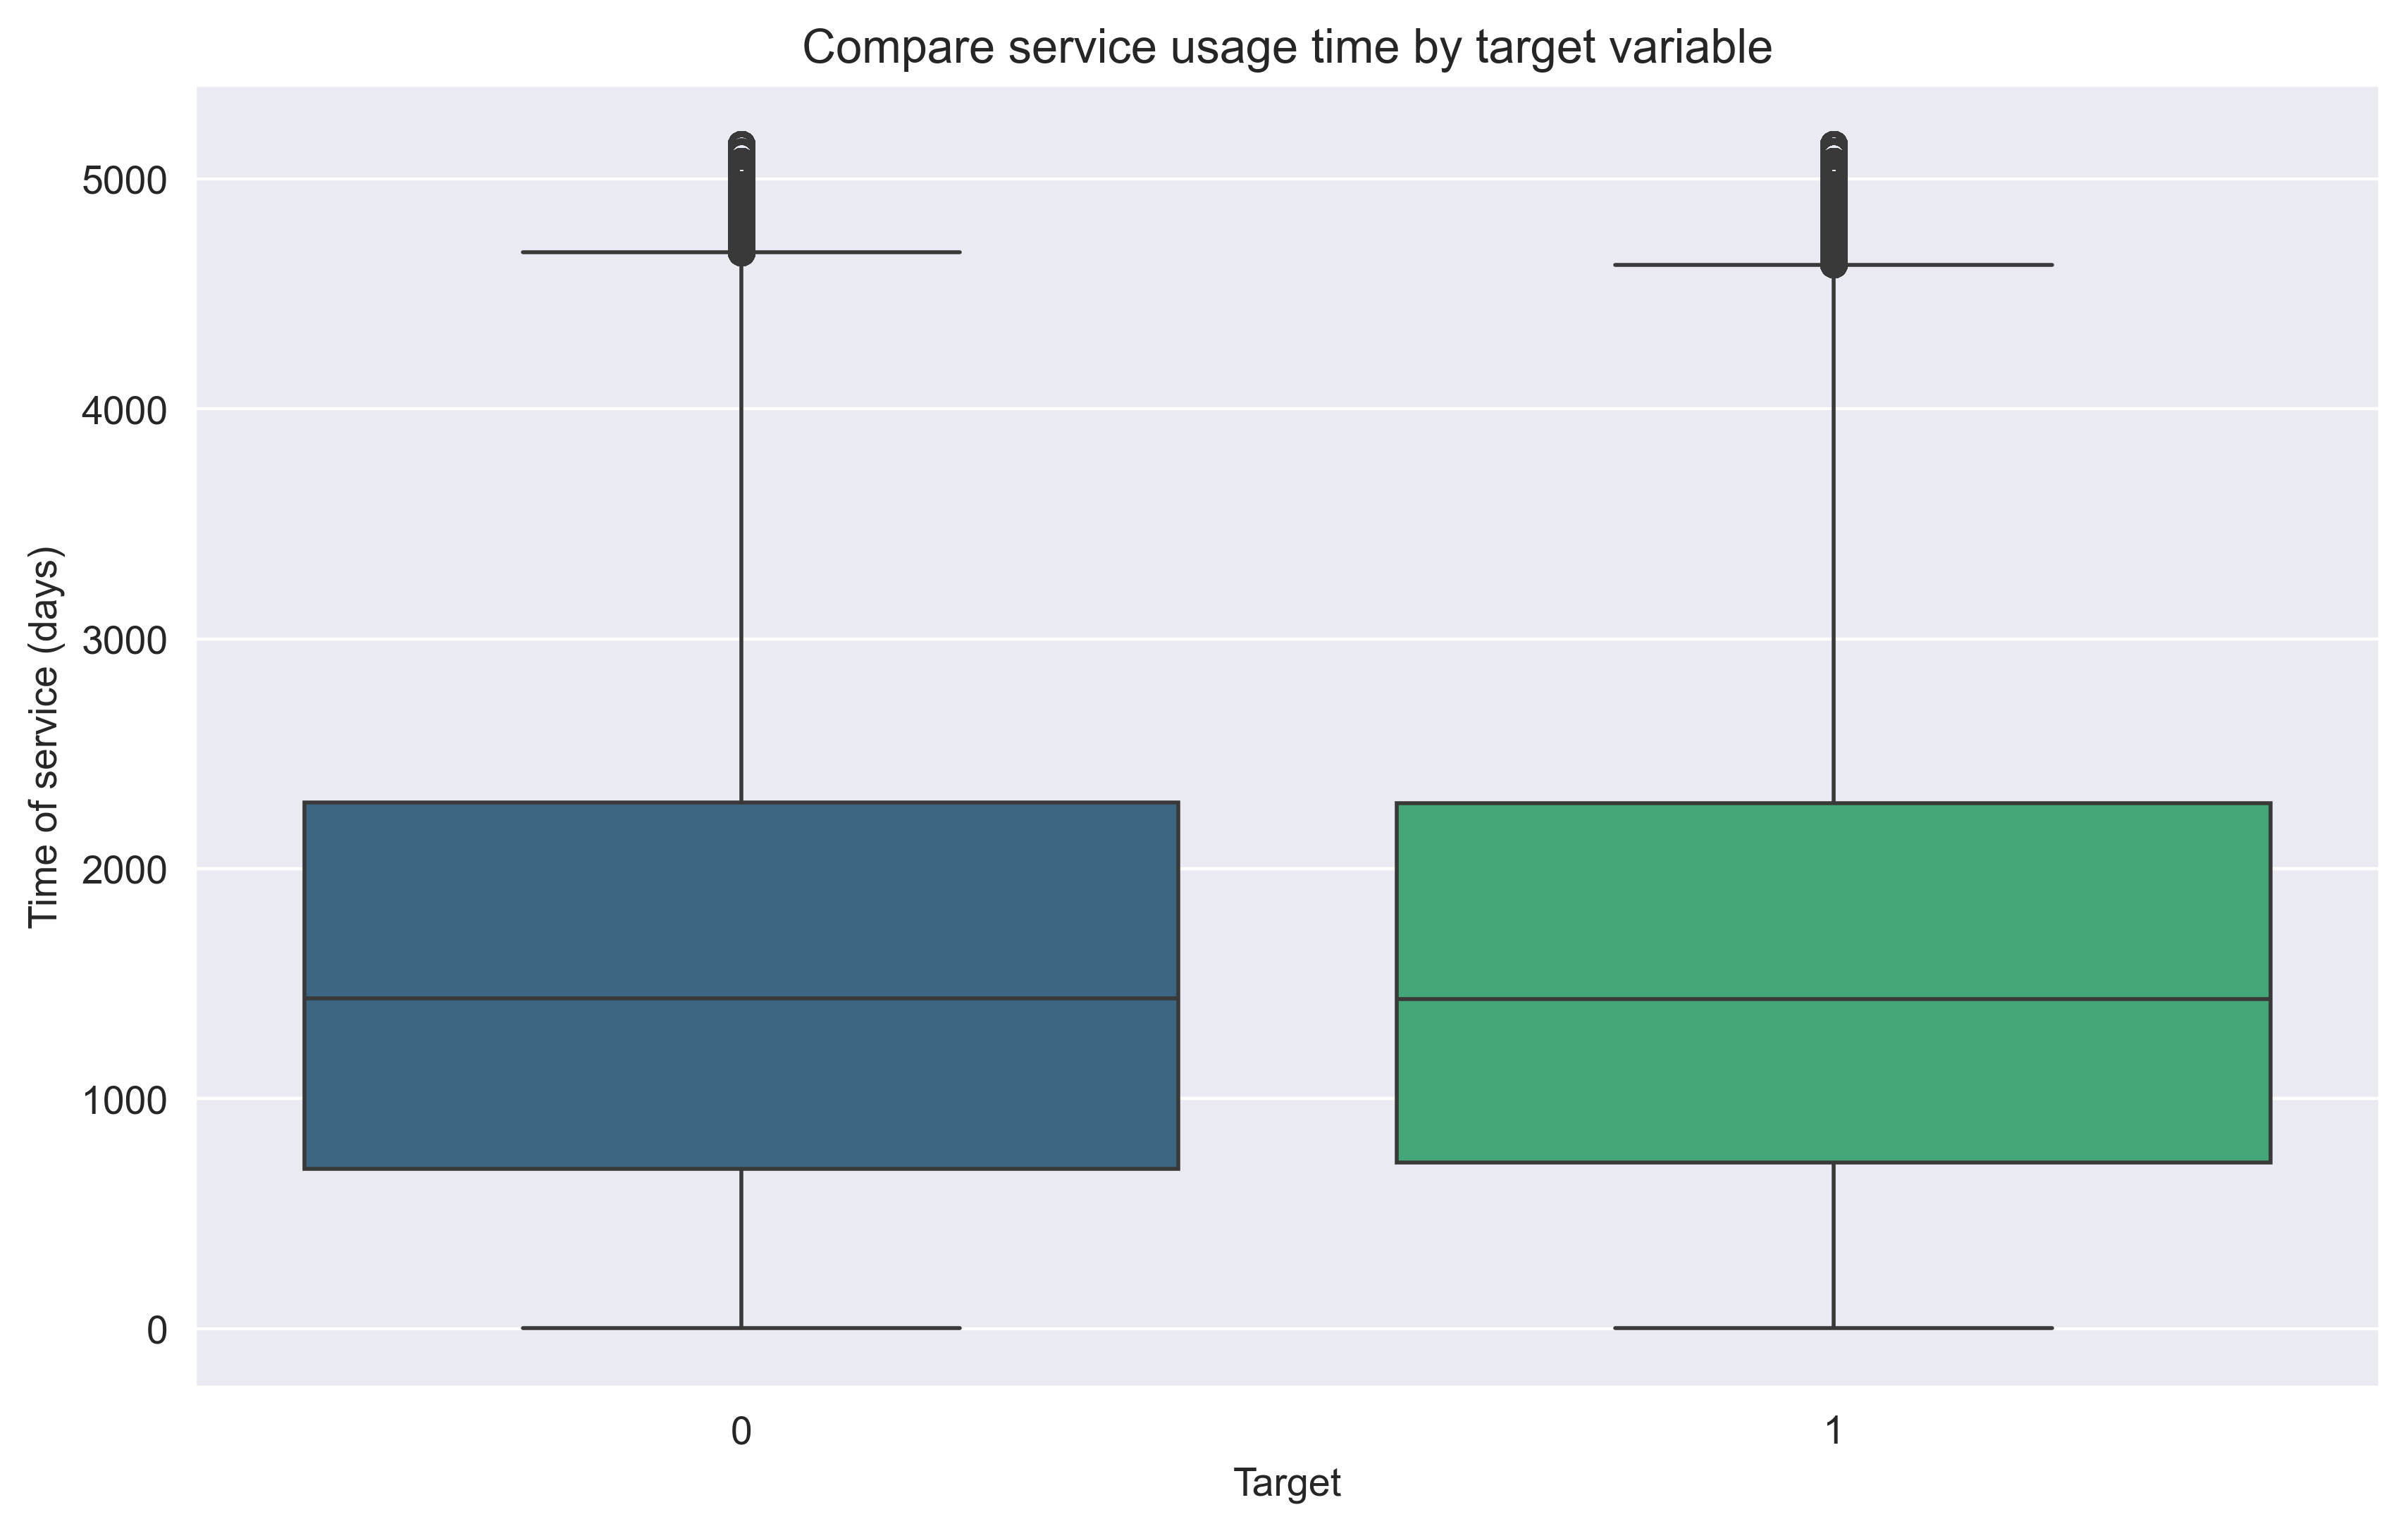

In [25]:
# Draw a box chart to compare membership _ duration by target variable
plt.figure(figsize = (10, 6), dpi=400)
sns.boxplot(x='target', y='membership_duration', data=train_df, palette='viridis')
plt.title('Compare service usage time by target variable')
plt.xlabel('Target')
plt.ylabel('Time of service (days)')
plt.savefig(os.path.join(eda_image_dir, '2.4_compare_service_usage_time_by_target.jpg'))
plt.show()

- The time spent on the service did not show a clear relationship with the repetitive behavior of listening to music. Both target = 0 and target = 1 groups had quite similar distribution of time spent on the service. From this comment, it is possible to consider removing or not using the membership _ duration column during model building, as it does not have a large impact on the target variable.
- `membership_duration` column also will be deleted later

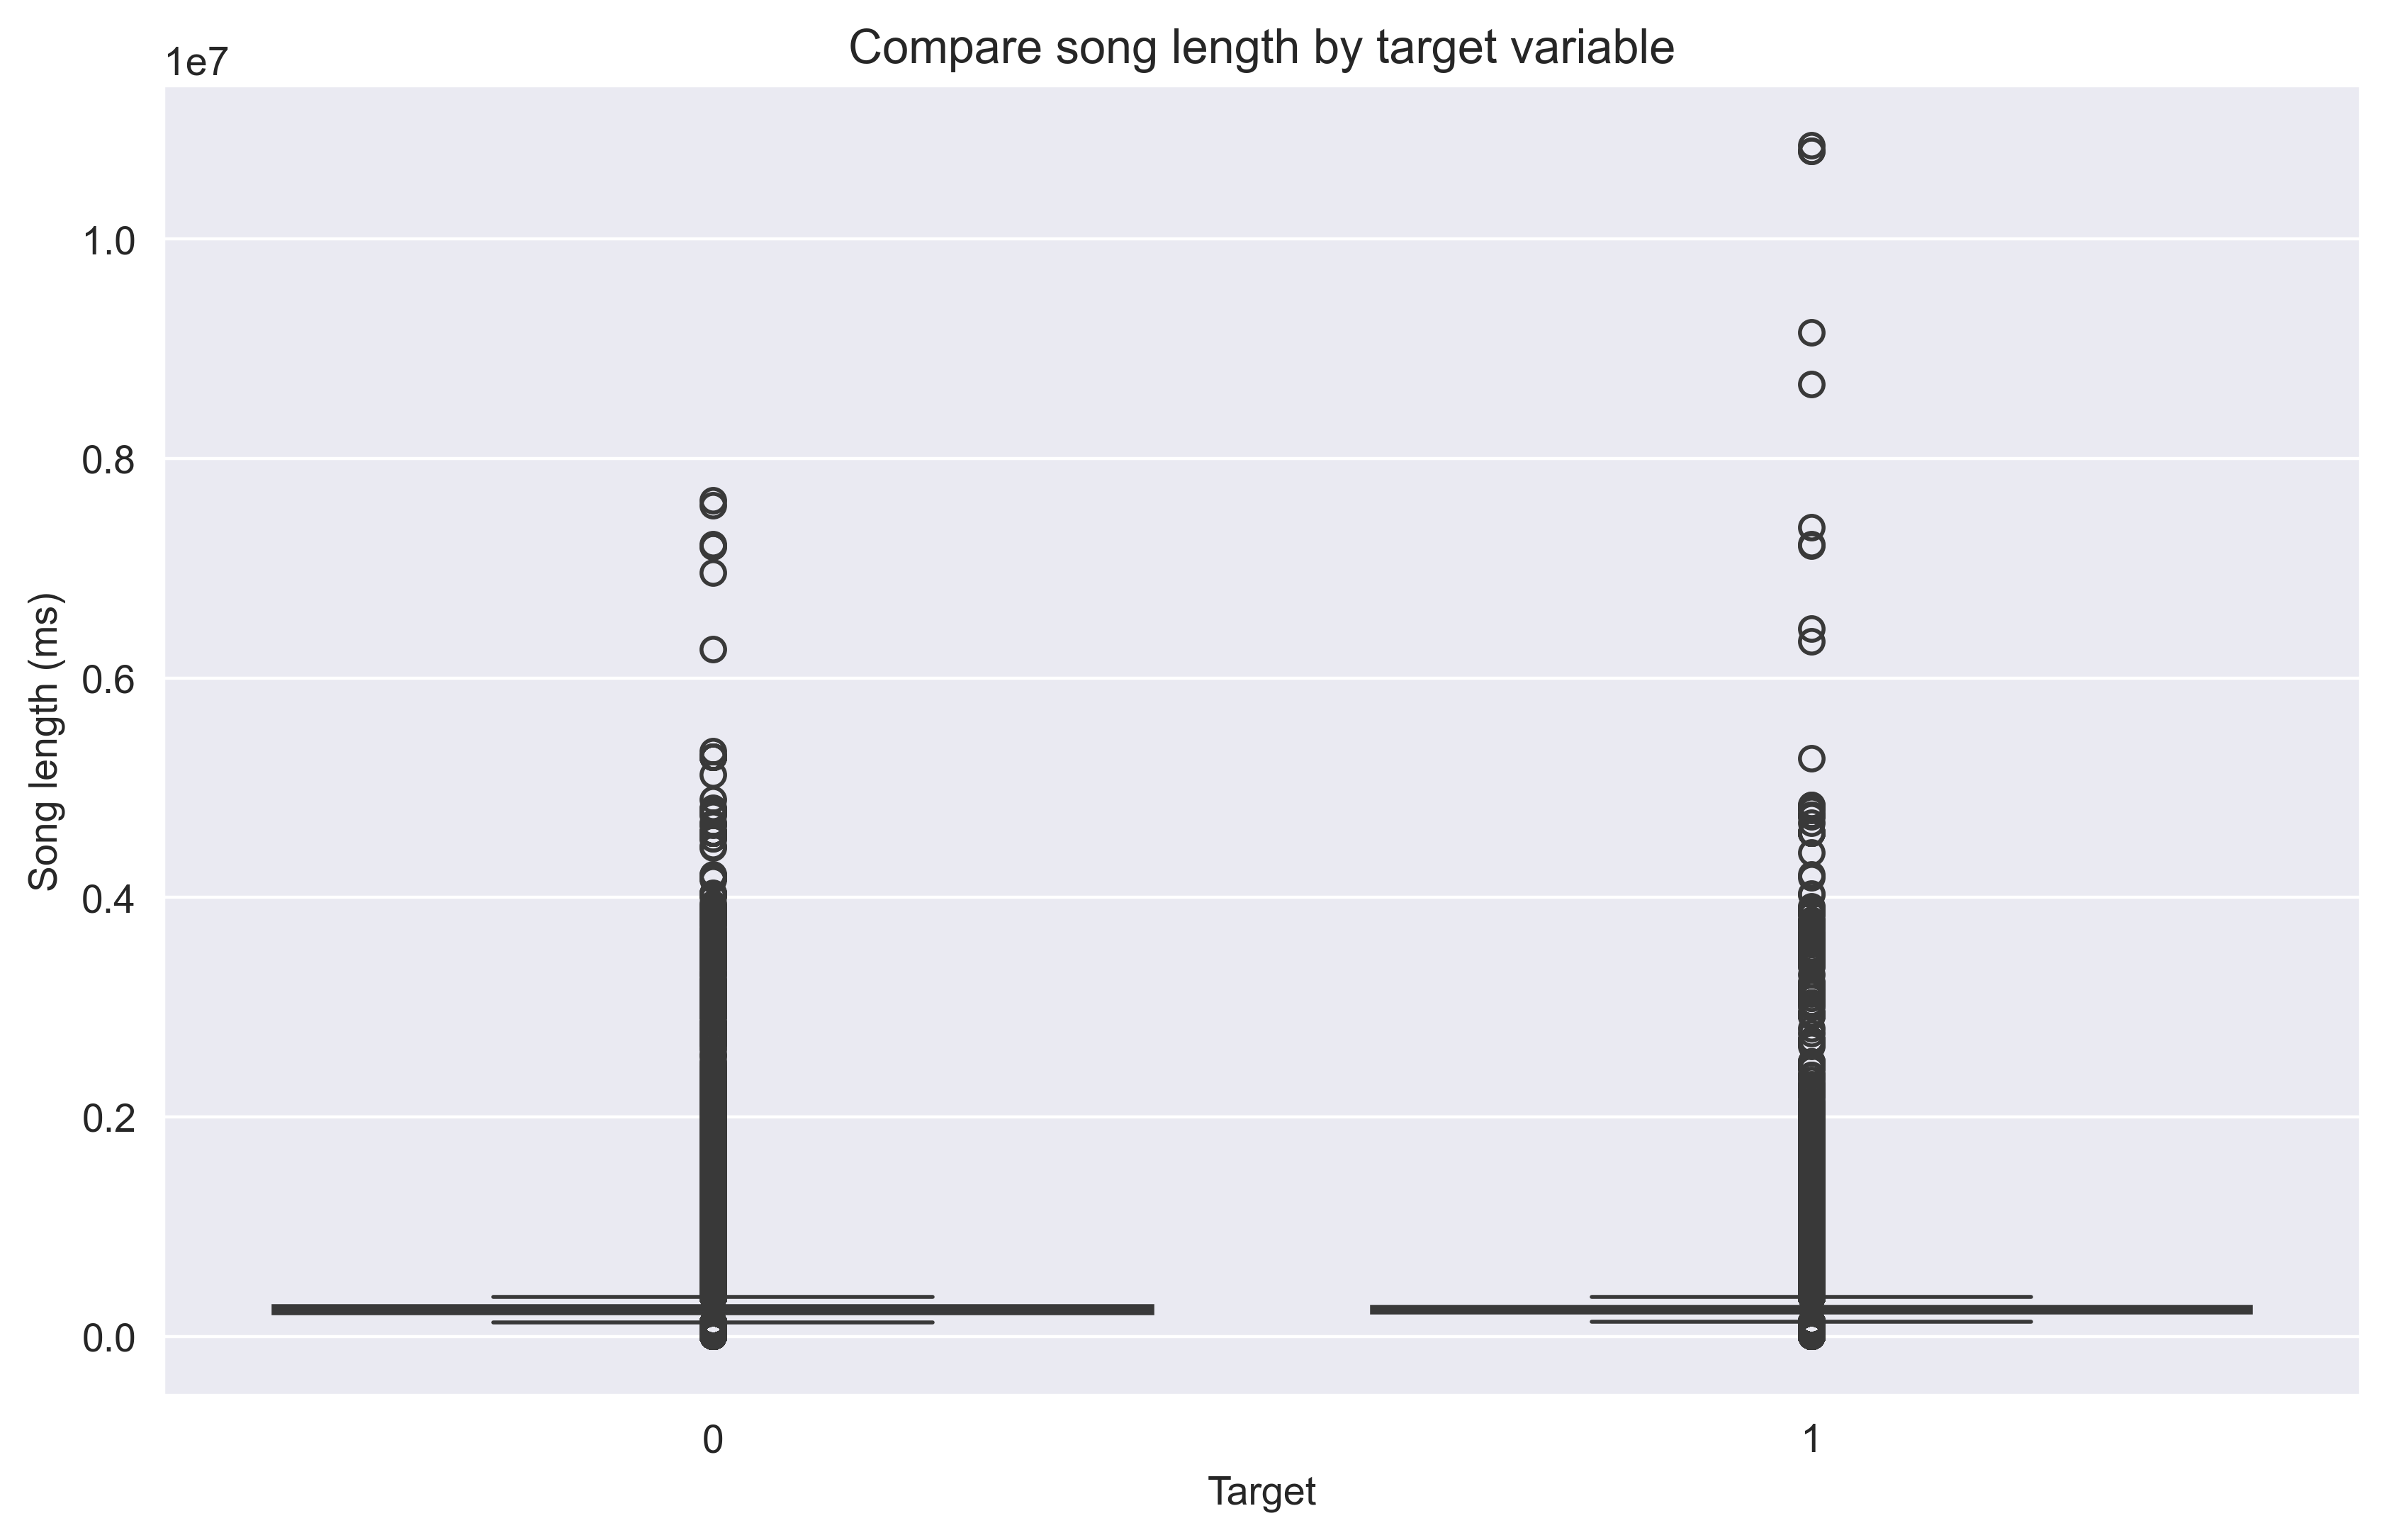

In [26]:
plt.figure(figsize=(10, 6), dpi=400)
sns.boxplot(x='target', y='song_length', data=train_df, palette='viridis')
plt.title('Compare song length by target variable')
plt.xlabel('Target')
plt.ylabel('Song length (ms)')
plt.savefig(os.path.join(eda_image_dir, '2.4_compare_song_length_by_target.jpg'))
plt.show()

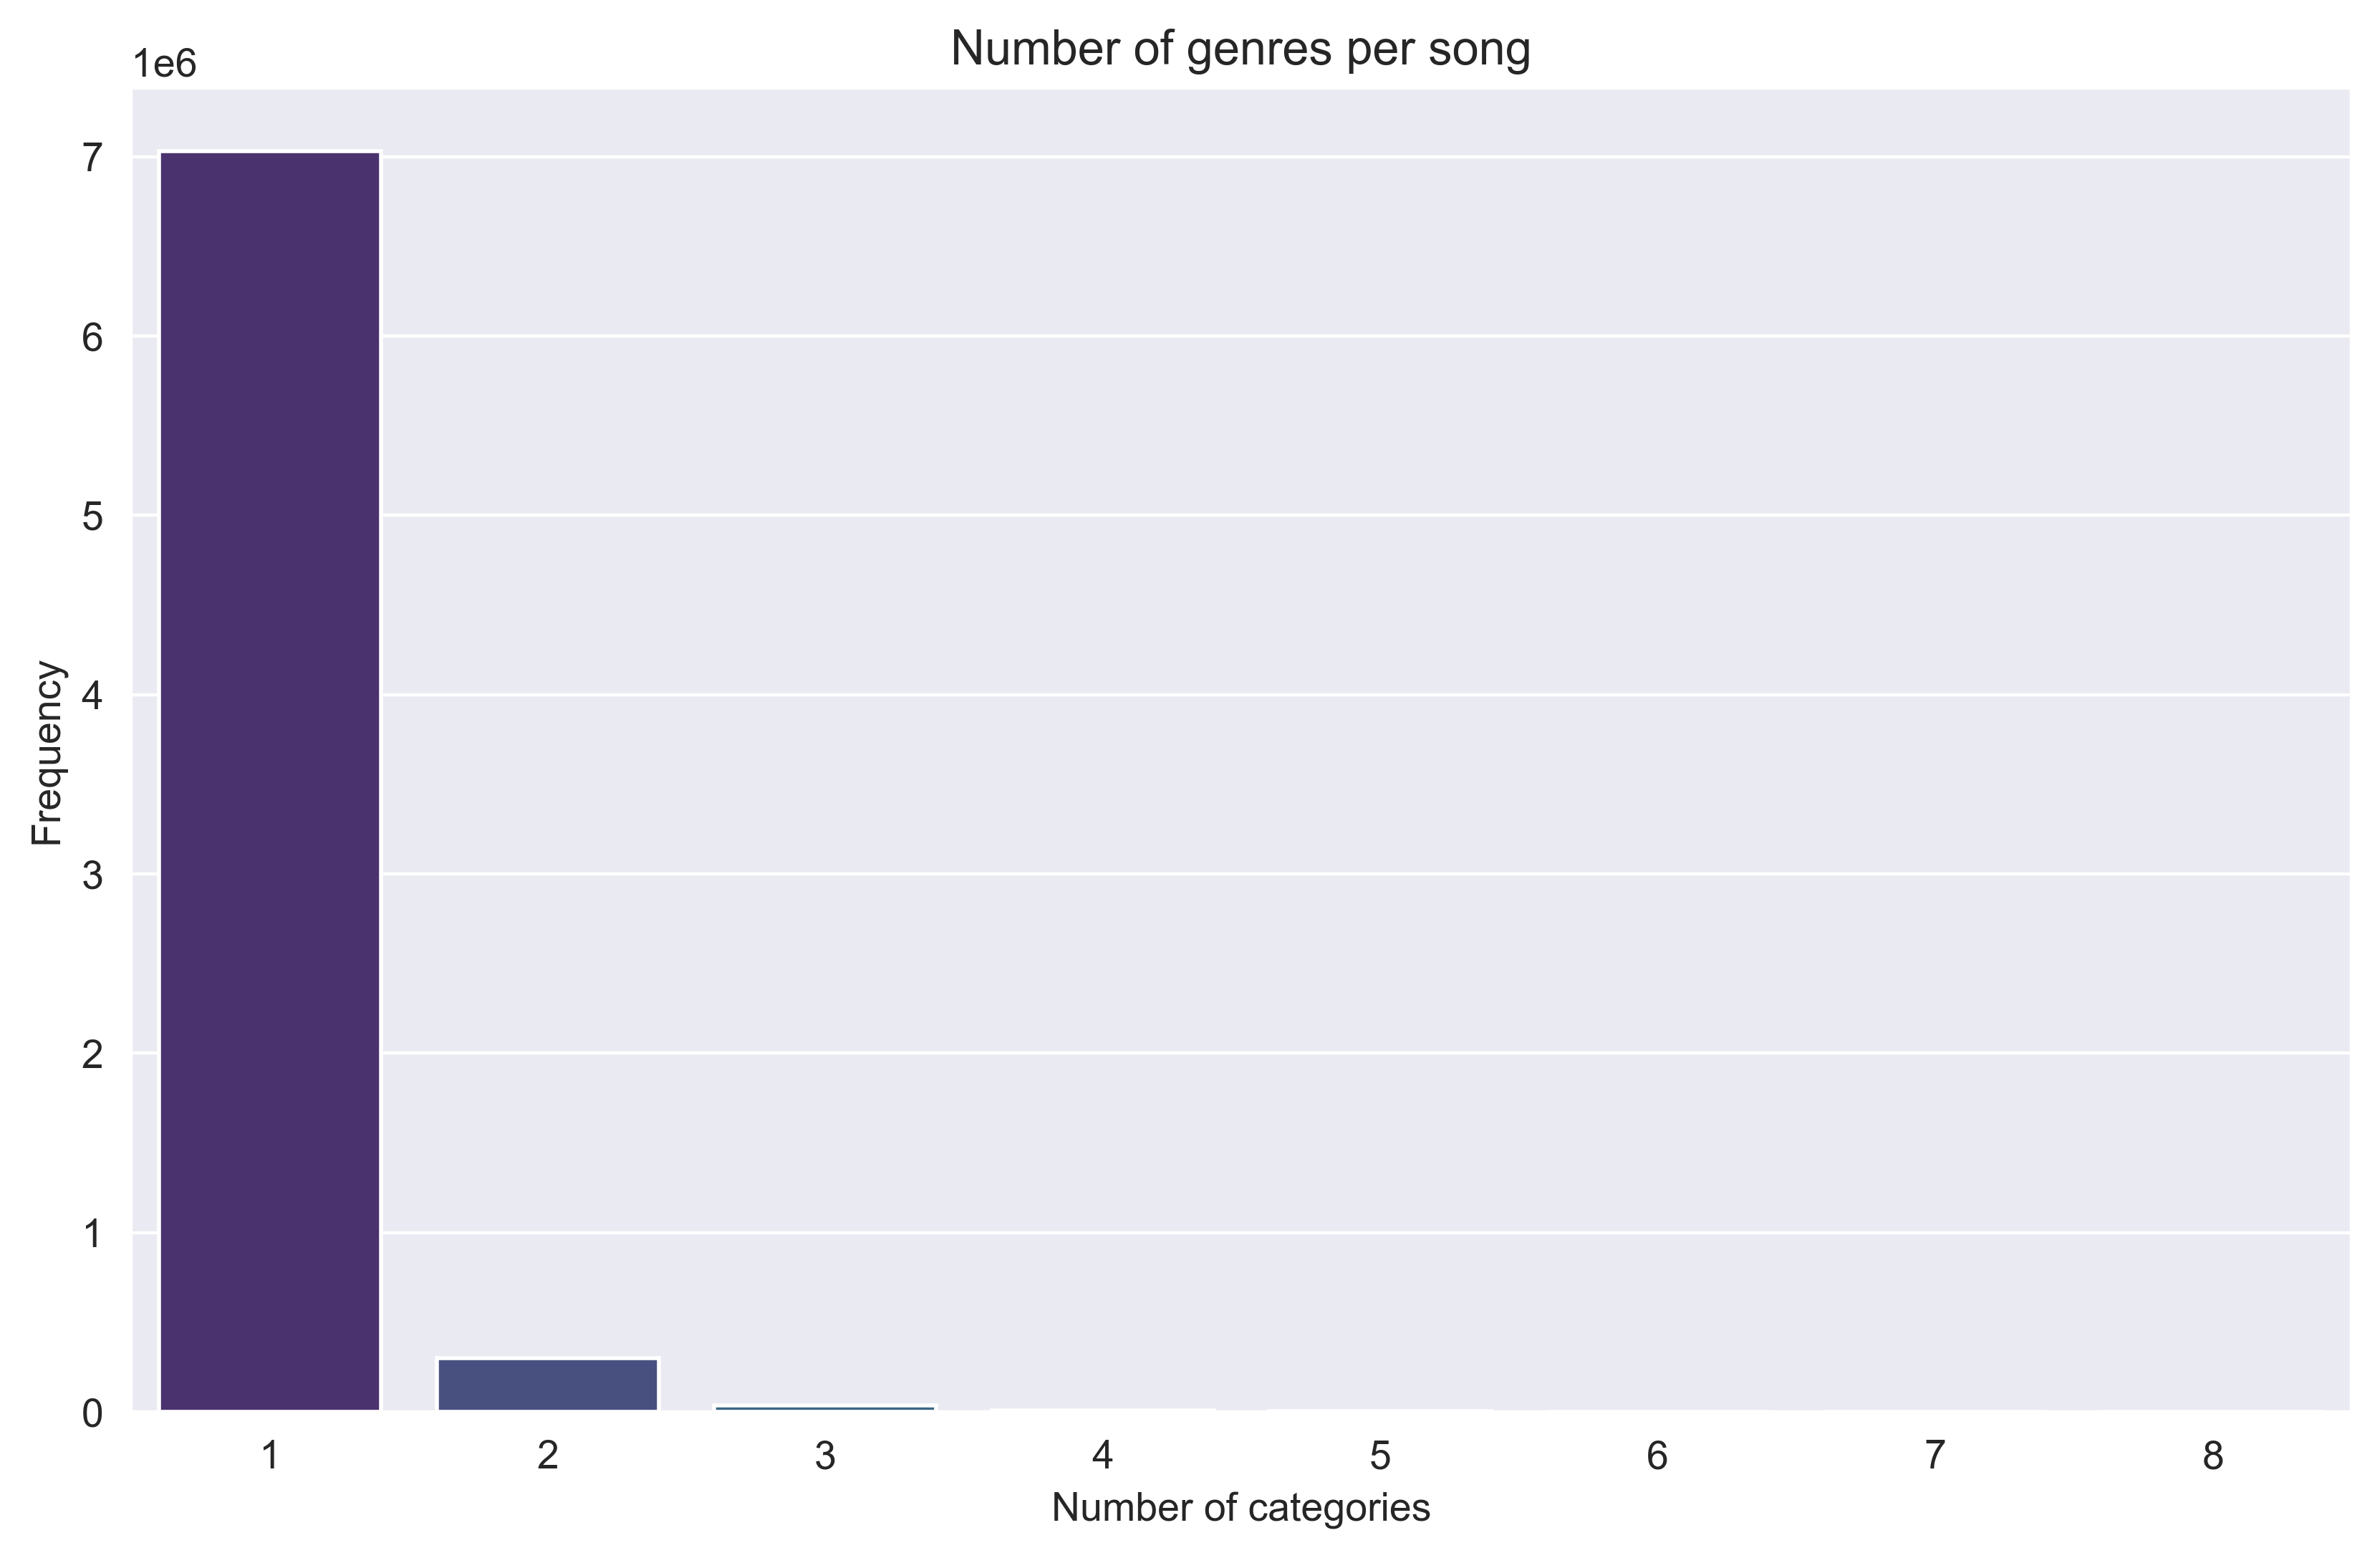

In [27]:
train_df['genre_count'] = train_df['genre_ids'].apply(lambda x: len(str(x).split('|')) if pd.notnull(x) else 0)

# Draw a distribution chart of the number of categories
plt.figure(figsize=(10, 6), dpi=400)
sns.countplot(x='genre_count', data=train_df, palette='viridis')
plt.title('Number of genres per song')
plt.xlabel('Number of categories')
plt.ylabel('Frequency')
plt.savefig(os.path.join(eda_image_dir, '2.4_number_of_genres_per_song.jpg'))
plt.show()

- The vast majority of songs fall into just one genre, and very few songs fall into multiple genres. This can affect a user's ability to predict listening behavior.
- Compare the relationship between the number of categories and the target variable.

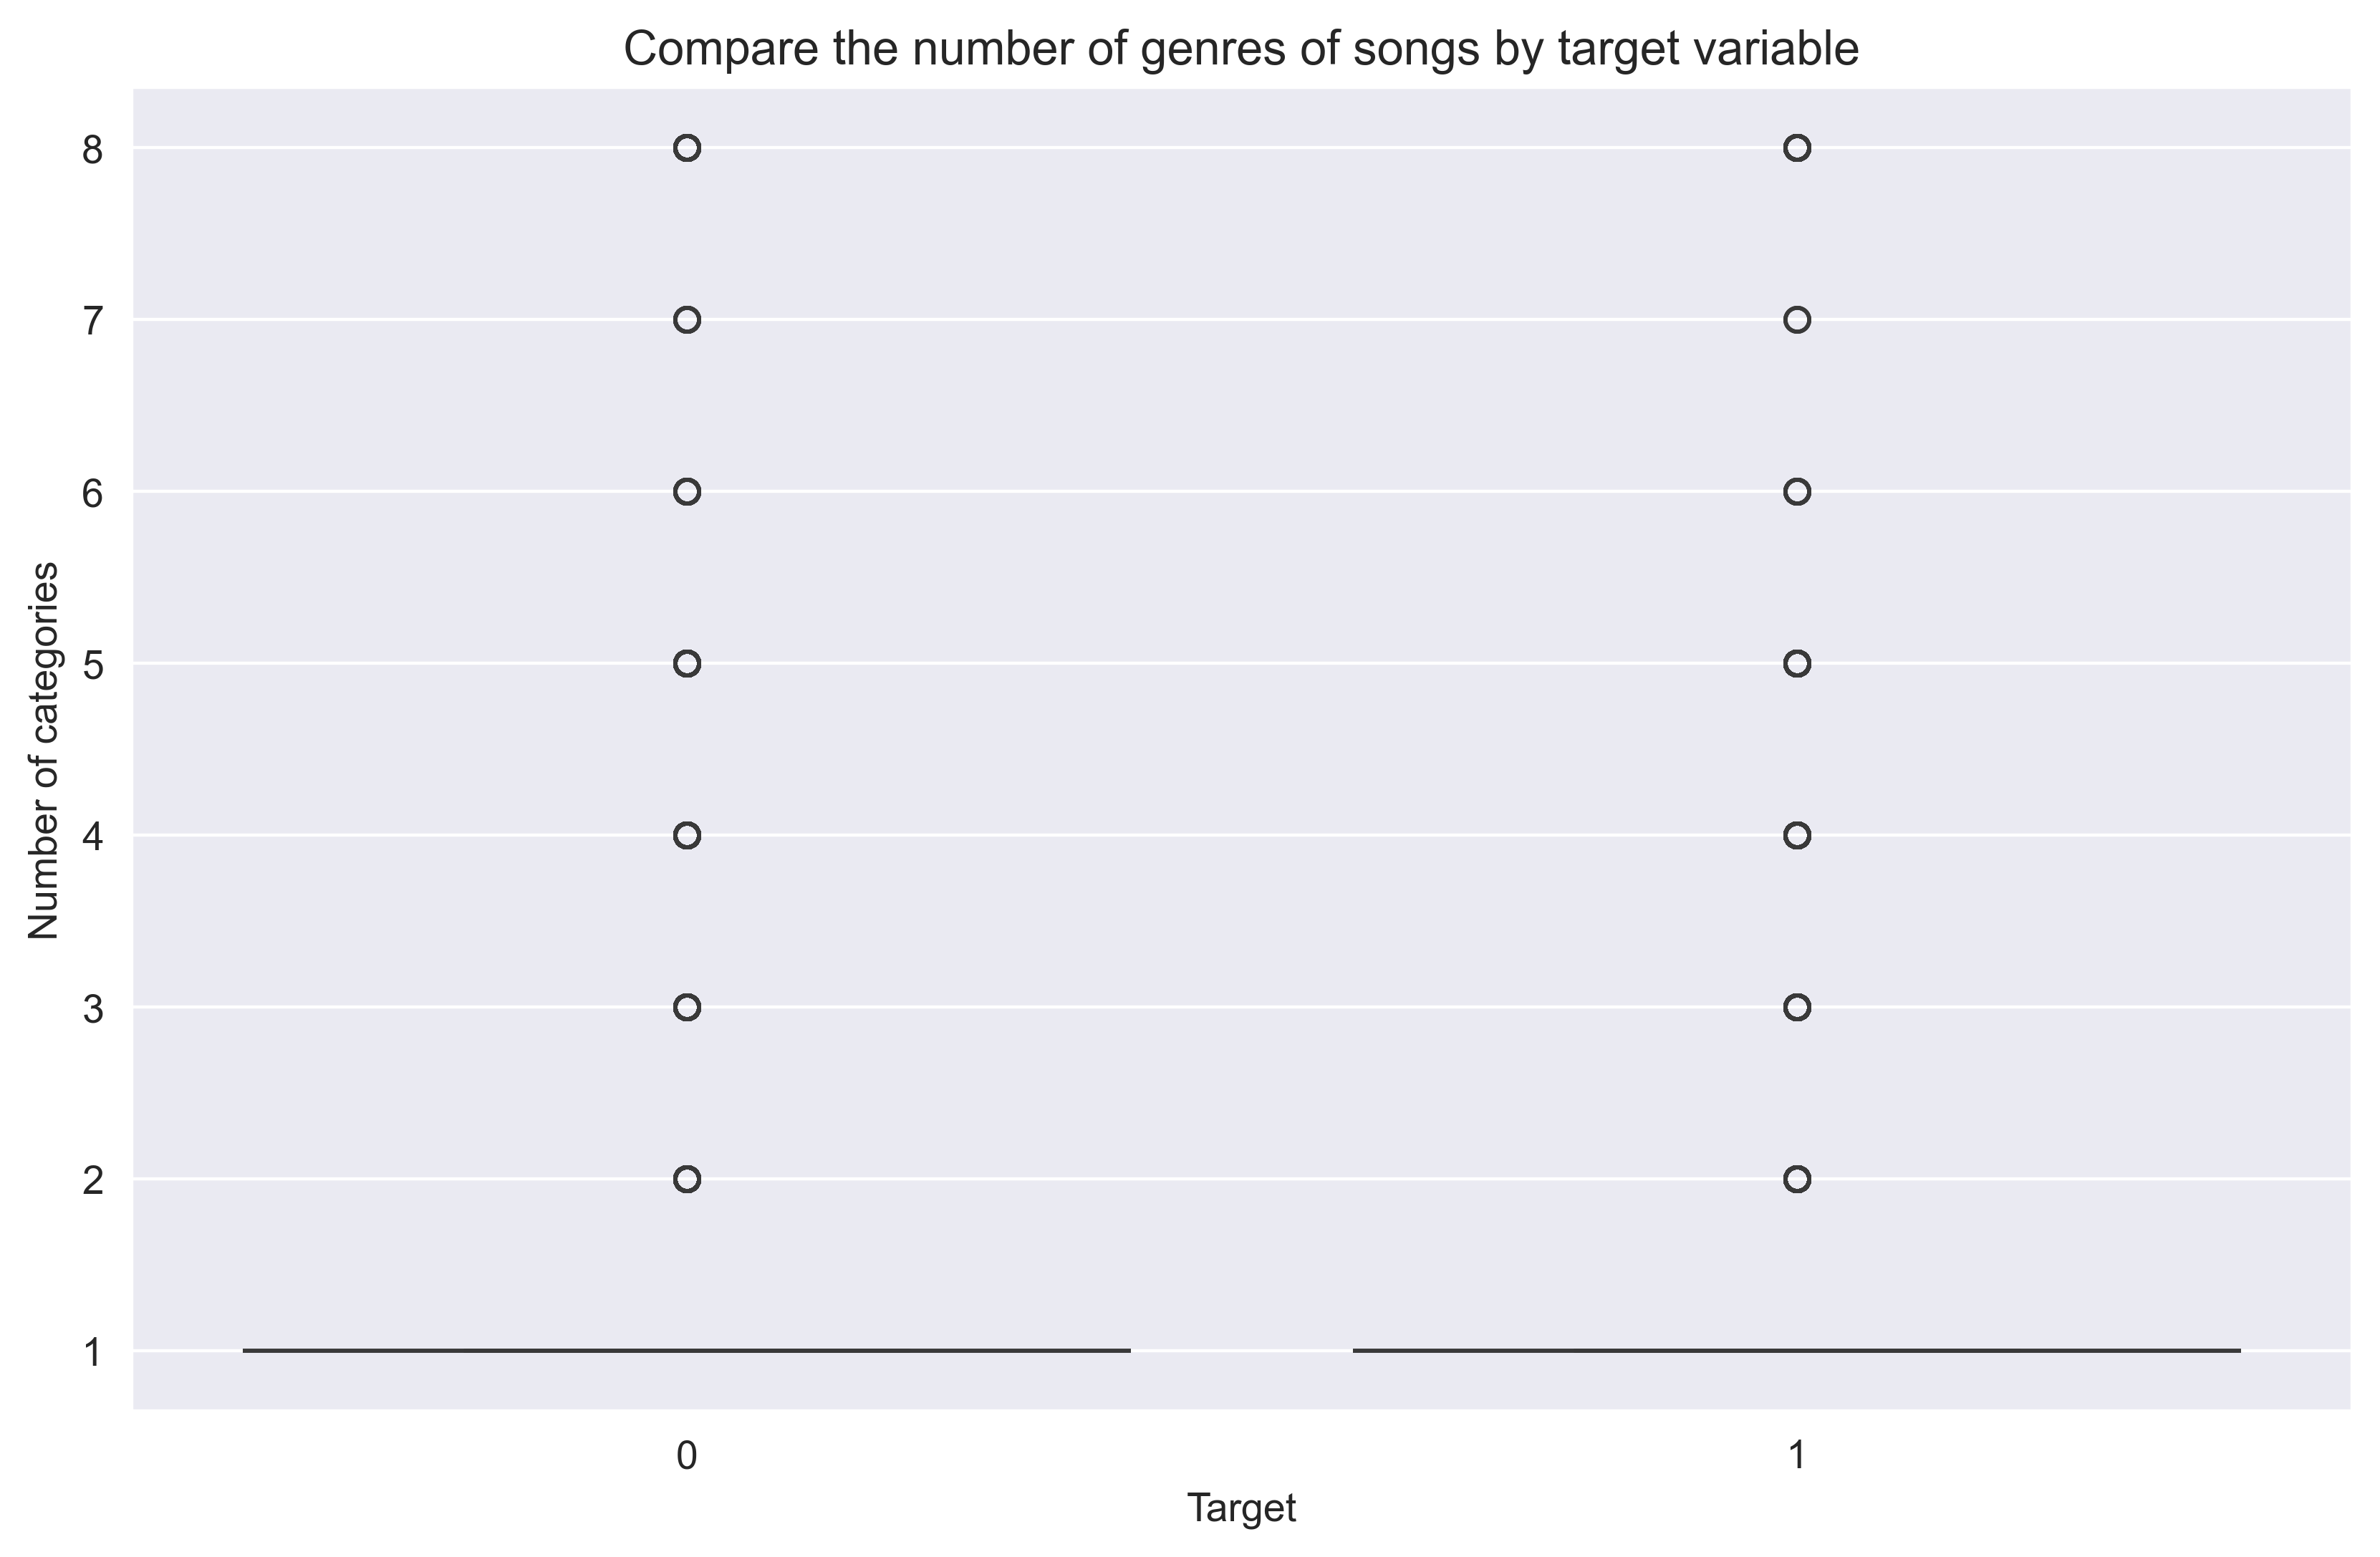

In [28]:
plt.figure(figsize=(10, 6), dpi=400)
sns.boxplot(x='target', y='genre_count', data=train_df, palette='viridis')
plt.title('Compare the number of genres of songs by target variable')
plt.xlabel('Target')
plt.ylabel('Number of categories')
plt.savefig(os.path.join(eda_image_dir, '2.4_compare_number_of_genres_per_song.jpg'))
plt.show()

- The number of genres a song belongs to doesn't have much of an impact on the likelihood of users repeating listening to the song.

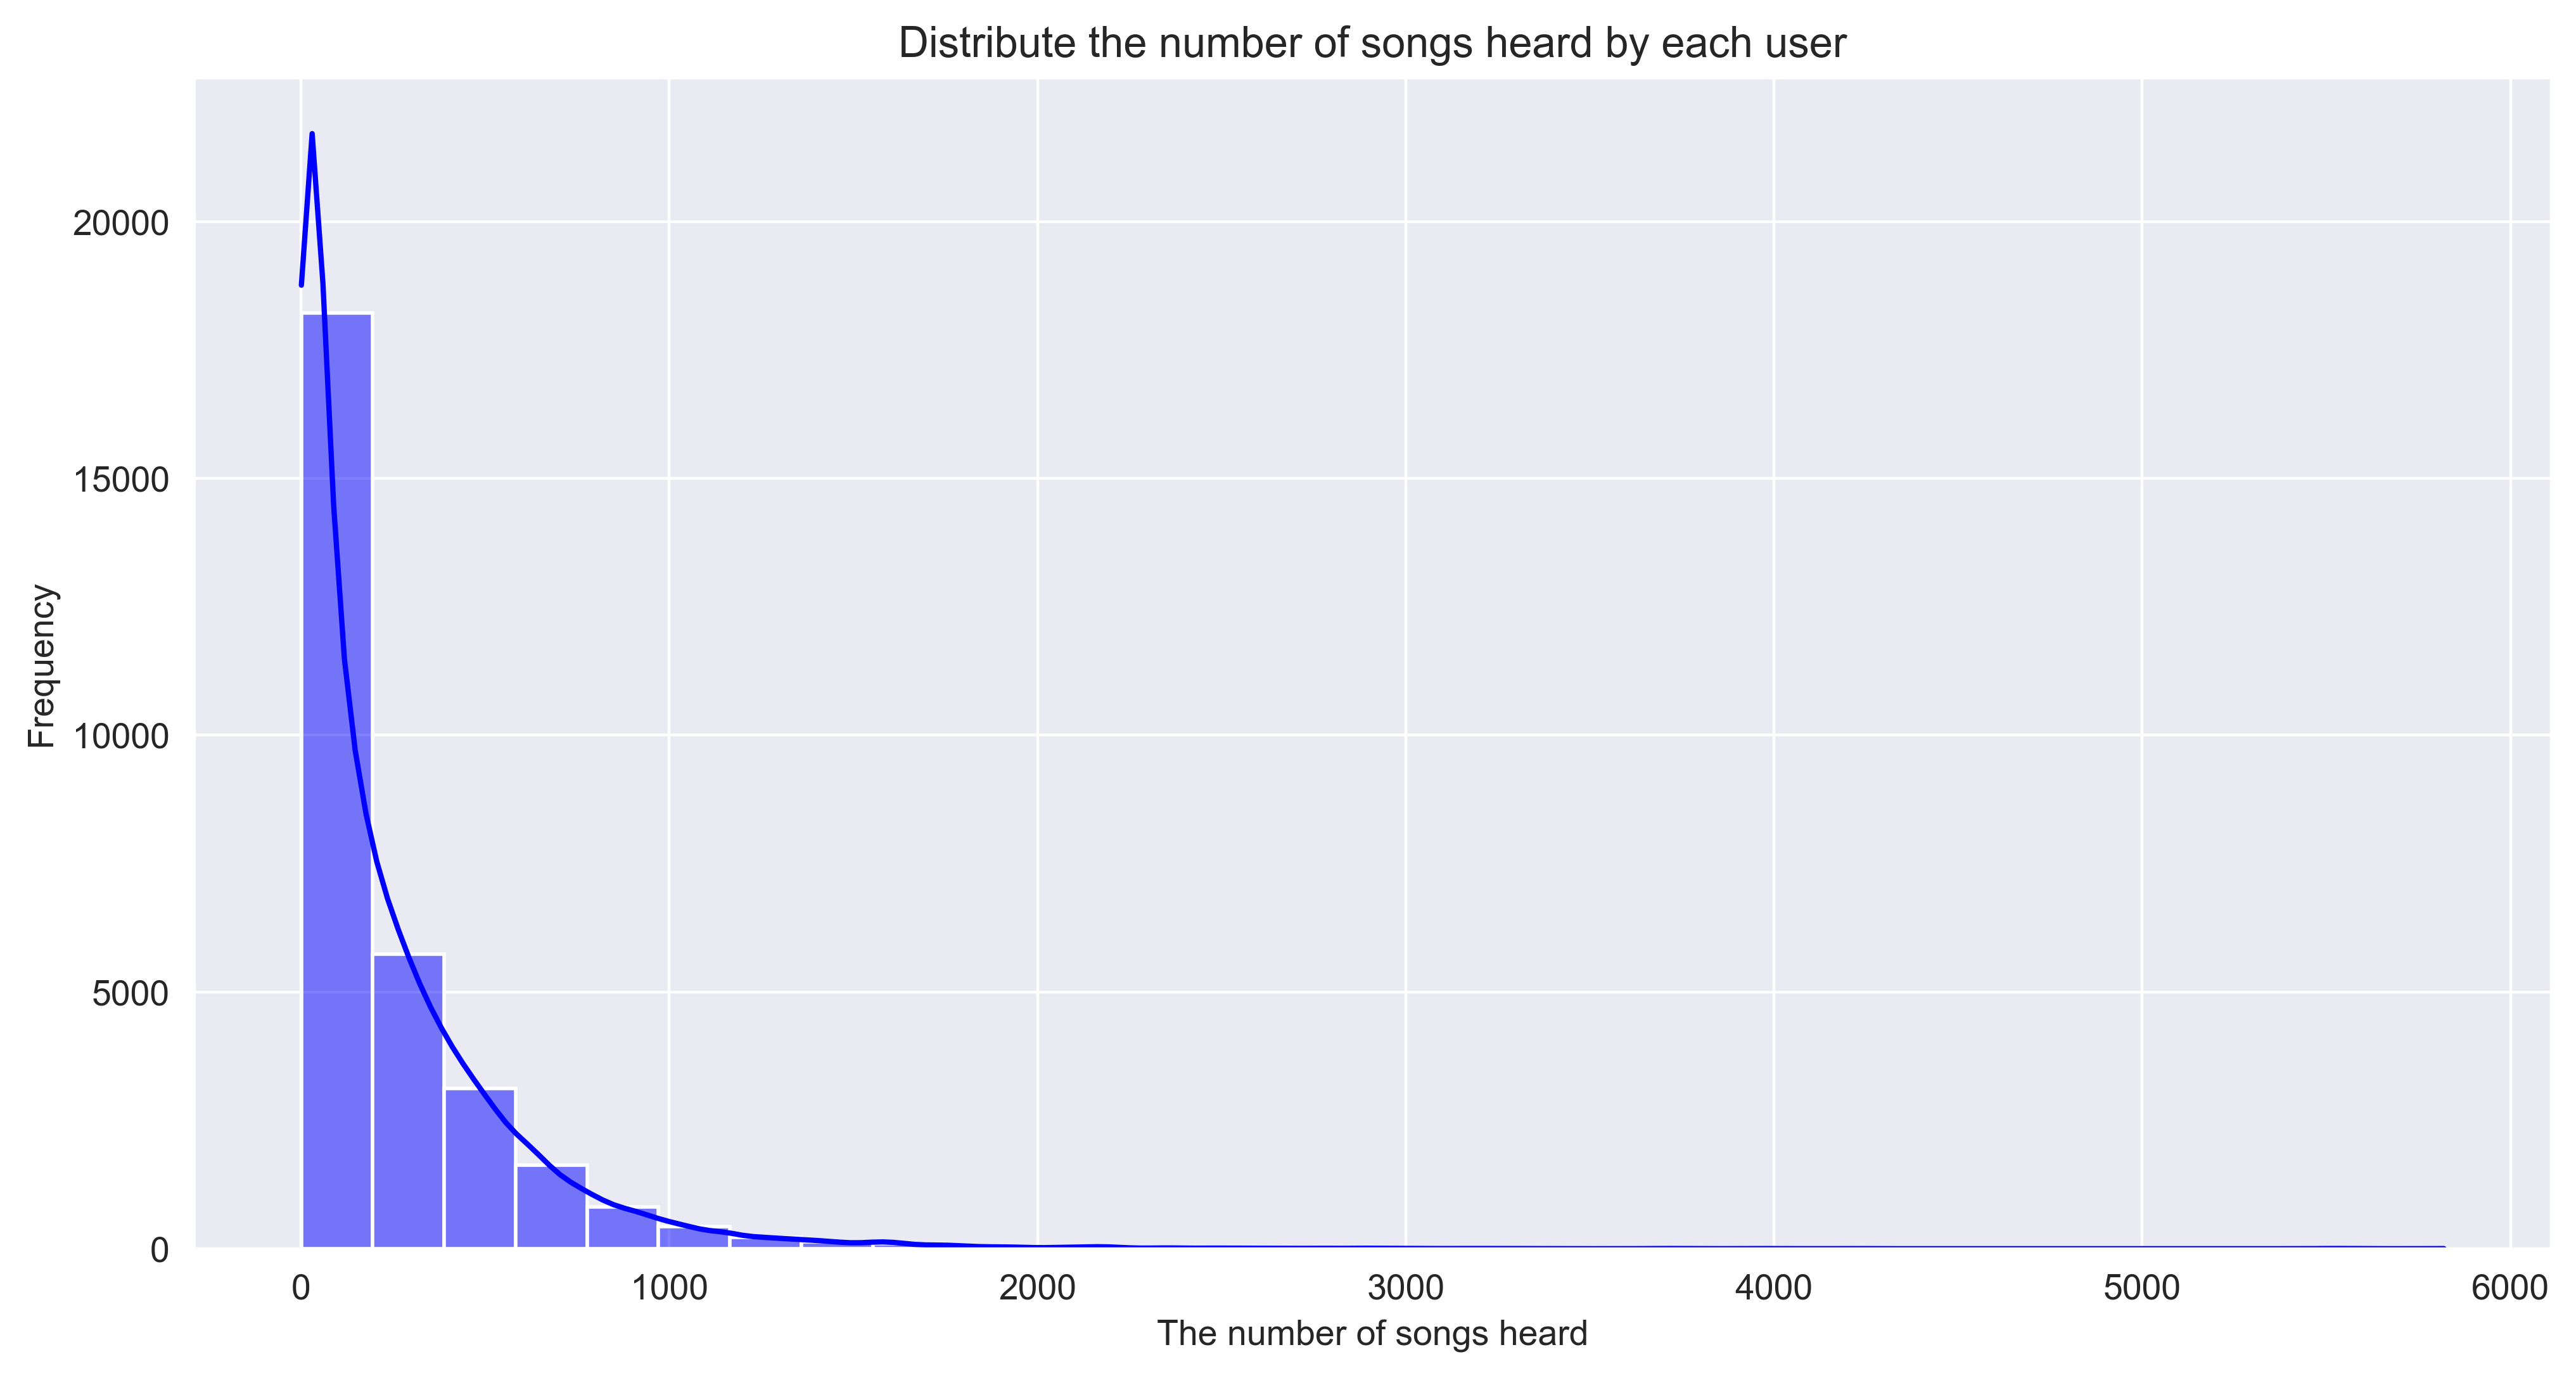

In [29]:
# Check the number of songs each user has heard (in the training set)
train_user_activity = train_df.groupby('msno')['song_id'].count()

# Graph the distribution of the number of songs heard by each user
plt.figure(figsize=(12, 6), dpi=400)
sns.histplot(train_user_activity, bins=30, kde=True, color='blue')
plt.title('Distribute the number of songs heard by each user')
plt.xlabel('The number of songs heard')
plt.ylabel('Frequency')
plt.savefig(os.path.join(eda_image_dir, '2.4_distribution_of_user_activity.jpg'))
plt.show()

## 2.5 Encoding Categorical Columns

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

cat_cols = train_df.select_dtypes(include="O").columns
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()
for col in cat_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])
train_df.head(5)

msno  song_id  source_system_tab  source_screen_name  source_type  target  \
0   8097    74669                  2                   7            7       1   
1  17123   223445                  4                   8            5       1   
2  17123   120740                  4                   8            5       1   
3  17123    23706                  4                   8            5       1   
4   8097    33307                  2                   7            7       1   

   song_length  genre_ids  artist_name  composer  ...    name    isrc  \
0     206471.0        285         3277     14581  ...   51438   65234   
1     284584.0         90        31957     60934  ...   81287  195646   
2     225396.0         90        21370     45053  ...   57299  253601   
3     255512.0          6        27435     36697  ...   34723   65562   
4     187802.0          2         4472      8485  ...  121783  131925   

   registration_init_time-day  registration_init_time-month  \
0                           2                             1   
1                          25                             5   
2                          25                             5   
3                          25                             5   
4                           2                             1   

   registration_init_time-year  expiration_date-day expiration_date-month  \
0                         2012                    5                    10   
1                         2011                   11                     9   
2                         2011                   11                     9   
3                         2011                   11                     9   
4                         2012                    5                    10   

  expiration_date-year  membership_duration  genre_count  
0                 2017                 2103            1  
1                 2017                 2301            1  
2                 2017                 2301            1  
3                 2017                 2301            1  
4                 2017                 2103            1  

[5 rows x 28 columns]

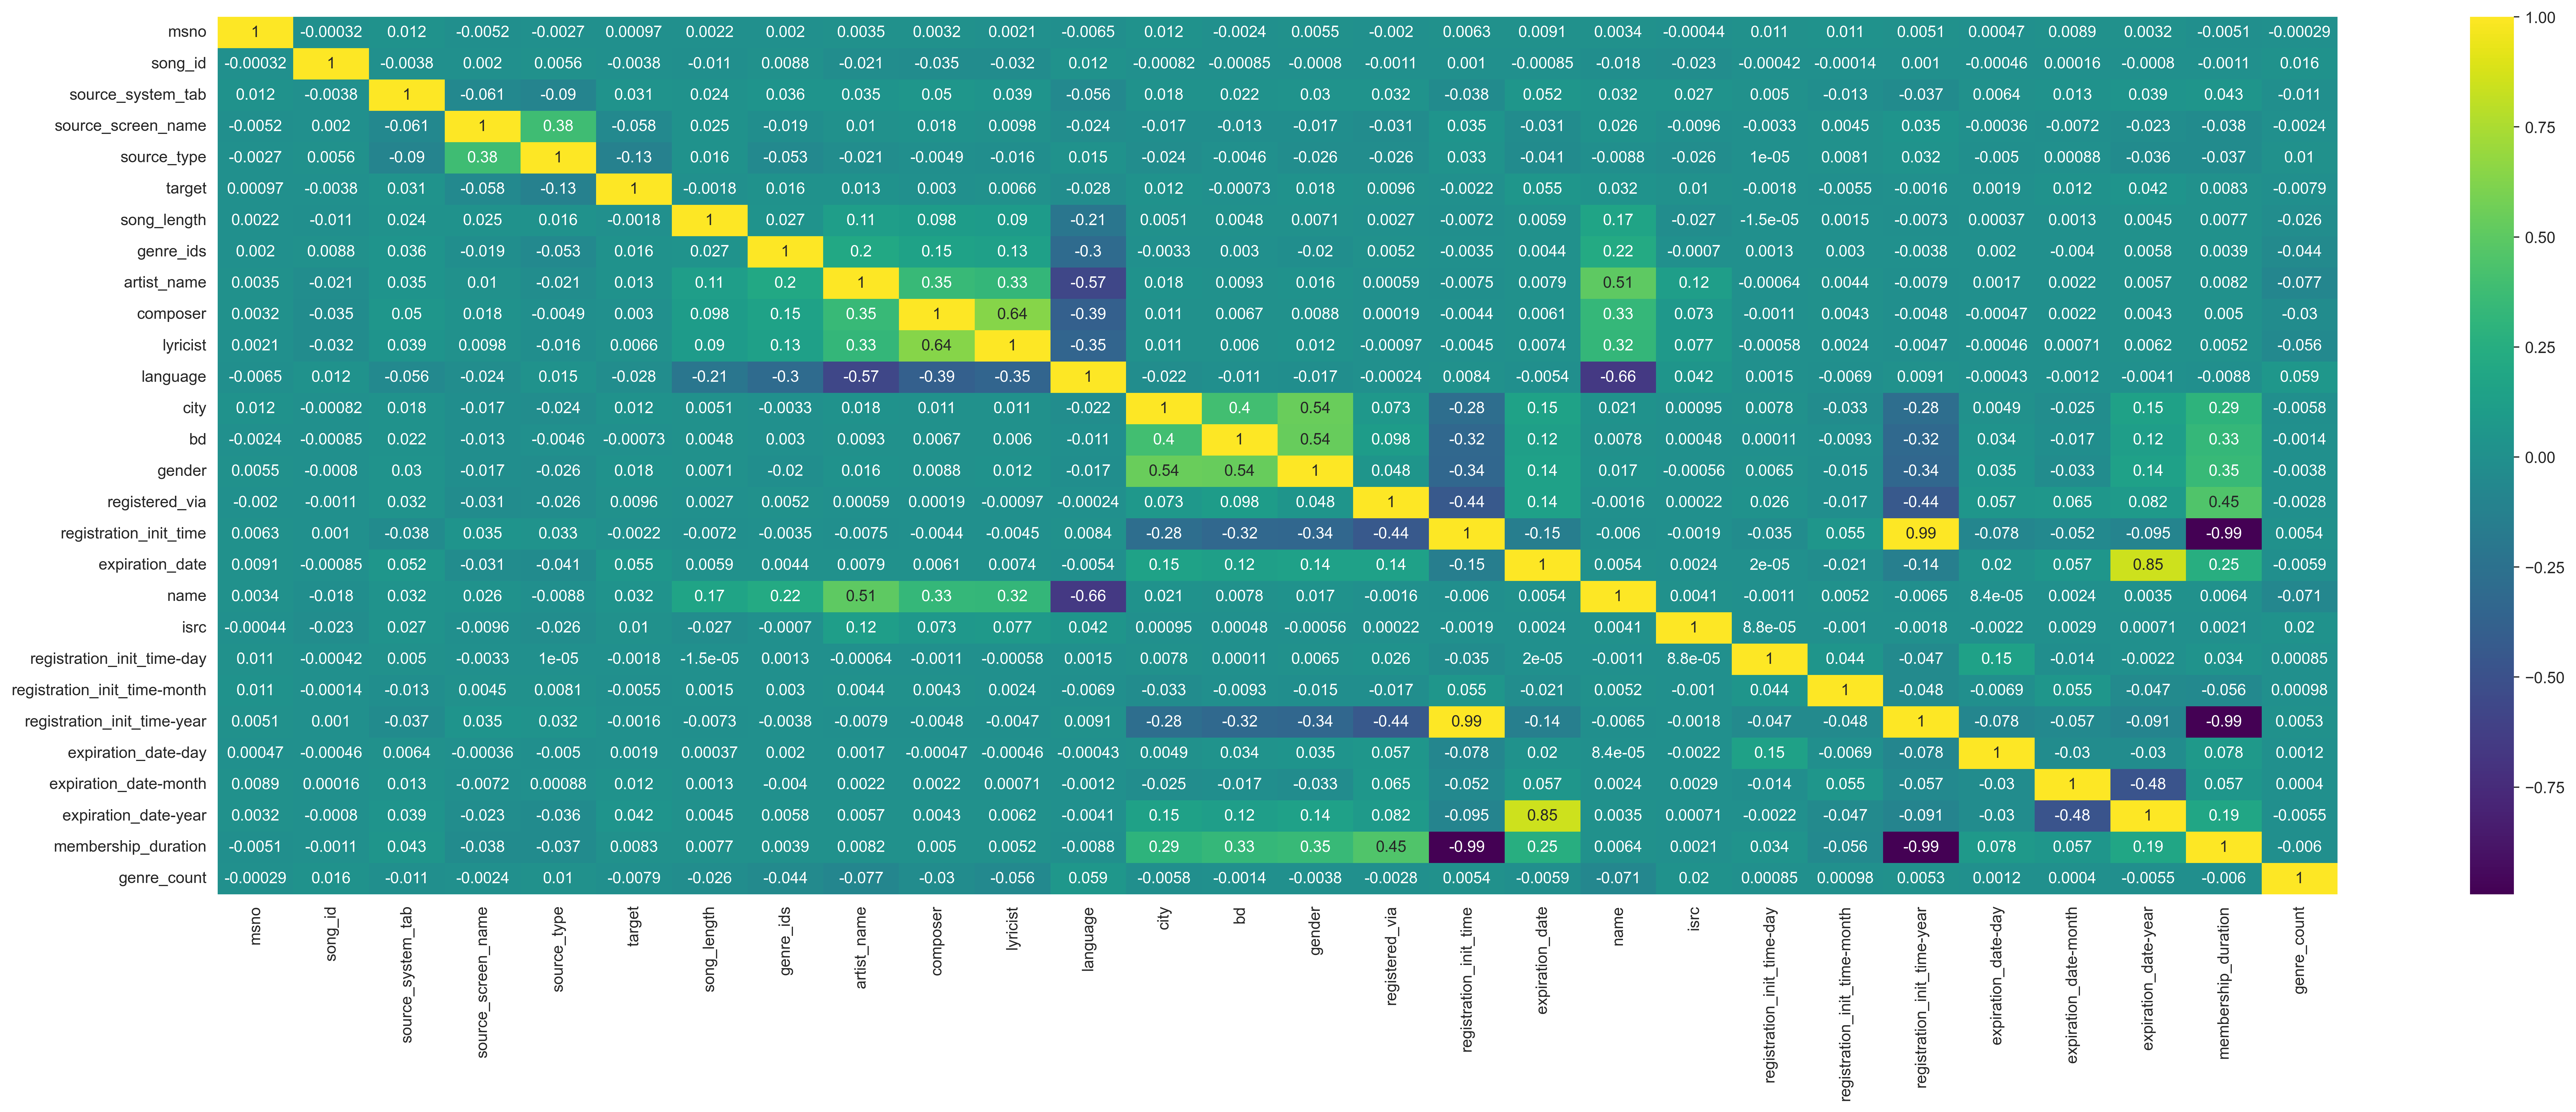

In [31]:
# Correlation matrix
plt.figure(figsize = (30, 10), dpi = 400)
sns.heatmap(train_df.corr(), annot=True, cmap = 'viridis')
plt.savefig(os.path.join(eda_image_dir, '2.4_corr_heat_map.jpg'))
plt.show()

In [32]:
# del msno, song_id and transformed date
print(train_df.shape)
train_df_processed = train_df.drop(columns={"registration_init_time", "expiration_date", "bd", "genre_count", "membership_duration"})
train_df_processed.head()

(7371556, 28)


msno  song_id  source_system_tab  source_screen_name  source_type  target  \
0   8097    74669                  2                   7            7       1   
1  17123   223445                  4                   8            5       1   
2  17123   120740                  4                   8            5       1   
3  17123    23706                  4                   8            5       1   
4   8097    33307                  2                   7            7       1   

   song_length  genre_ids  artist_name  composer  ...  gender  registered_via  \
0     206471.0        285         3277     14581  ...       0               7   
1     284584.0         90        31957     60934  ...       1               9   
2     225396.0         90        21370     45053  ...       1               9   
3     255512.0          6        27435     36697  ...       1               9   
4     187802.0          2         4472      8485  ...       0               7   

     name    isrc  registration_init_time-day  registration_init_time-month  \
0   51438   65234                           2                             1   
1   81287  195646                          25                             5   
2   57299  253601                          25                             5   
3   34723   65562                          25                             5   
4  121783  131925                           2                             1   

   registration_init_time-year  expiration_date-day  expiration_date-month  \
0                         2012                    5                     10   
1                         2011                   11                      9   
2                         2011                   11                      9   
3                         2011                   11                      9   
4                         2012                    5                     10   

   expiration_date-year  
0                  2017  
1                  2017  
2                  2017  
3                  2017  
4                  2017  

[5 rows x 23 columns]

In [33]:
train_df_processed.shape

(7371556, 23)

In [35]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(train_df_processed, test_size = 0.2, random_state = 42)
train_df4mf = train_data[["msno", "song_id", "target"]]
test_df4mf = test_data[["msno", "song_id", "target"]]

In [36]:
os.makedirs("data/processed_data", exist_ok = True)
train_df4mf.to_csv("data/processed_data/train_processed_data_mf.csv", index = False)
train_data.to_csv("data/processed_data/train_processed_data.csv", index = False)
test_df4mf.to_csv("data/processed_data/test_processed_data_mf.csv", index = False)
test_data.to_csv("data/processed_data/test_processed_data.csv", index = False)